# Importing Necessary Libraries

In [5]:
#we used 'requests' to grab the webpage content and 'BeautifulSoup' to help us parse the HTML
import re
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Scraping the website

In [7]:
#this is the the webpage link we want to scrape fatal crash data from.
url='https://www.iihs.org/topics/fatality-statistics/detail/state-by-state#:~:text=Posted%20June%202024.-,Fatal%20crash%20totals,per%20100%20million%20miles%20traveled.'
page = requests.get(url) #send a 'get' request to the website to fetch the page's content

soup= BeautifulSoup(page.text,'html') #use beautiful soup to parse html content

In [8]:
print(soup)

<!DOCTYPE html>
<html class="no-js" lang="en" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml" xmlns:v-bind="http://vue.bind/xhtml" xmlns:v-on="http://vue.on/xhtml">
<head>
<title>State by state</title>
<meta charset="utf-8"/>
<meta content="A summary of fatality statistics about state by state compiled by IIHS from 2022 Fatality Analysis Reporting System (FARS) data." name="description"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="#ffcc33" name="theme-color"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@IIHS_autosafety" name="twitter:site"/>
<meta content="7SKSdnUFIX0vq2YkHfOZnHGTxPKkyob7MUusaq3dOu0" name="google-site-verification"/>
<meta content="en_US" property="og:locale"/>
<meta content="IIHS-HLDI crash testing and highway safety" property="og:site_name"/>
<meta content="website" id="ogtype" property="og:type"/>
<meta content="Fatality Facts 2022: State by state" id="ogtitle" property="og:ti

In [9]:
#we use the findall to find the <div> elements that match the class for the fatality tables, because this
#specific class identifies the styled tables containing fatality data
Tables = soup.findAll('div', class_= "table fatality-table is-striped is-bordered is-hoverable is-fullwidth")

In [10]:
fatalityTable = Tables[0] #we use [0] bc it is the first table we need
fatalityTable #showing HTML content of that first table

<div class="table fatality-table is-striped is-bordered is-hoverable is-fullwidth">
<table is-sticky="true">
<thead>
<tr>
<th class="table-title" colspan="6">Population, fatal motor vehicle crashes, motor vehicle crash deaths and motor vehicle crash death rates per state, 2022</th>
</tr>
<tr>
<th class="first-column" colspan="1" rowspan="1" scope="col">State</th>
<th class="" colspan="1" rowspan="1" scope="col">Population</th>
<th class="" colspan="1" rowspan="1" scope="col">Vehicle miles traveled (millions)</th>
<th class="" colspan="1" rowspan="1" scope="col">Deaths</th>
<th class="" colspan="1" rowspan="1" scope="col">Deaths per 100,000 population</th>
<th class="" colspan="1" rowspan="1" scope="col">Deaths per 100 million vehicle miles traveled</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<th class="first-column" colspan="1" rowspan="1" scope="row">Alabama</th>
<td colspan="1" rowspan="1">5,074,296</td>
<td colspan="1" rowspan="1">71,631</td>
<td colspan="1" rowspan="1">988</td>
<t

In [11]:
#We extract the column headers (or the table headings) and select the second <tr> inside <thead>
#because that’s usually where the actual column names are
columns = [th.get_text(strip=True) for th in fatalityTable.find_all('thead')[0].find_all('tr')[1].find_all('th')]

#here we are looping through each row of the table’s body (<tbody>) and pulling out the text from every cell, trimming off spaces and
#newline characters and then these cleaned-up rows get added to a list.
rows = []
for row in fatalityTable.find('tbody').find_all('tr'):
    cells = row.find_all(['td', 'th'])
    rows.append([cell.get_text(strip=True) for cell in cells])

#convert cleaned-up data into a pandas DataFrame with proper column names
fatality_df = pd.DataFrame(rows, columns=columns)


In [12]:
fatality_df

,State,Population,Vehicle miles traveled (millions),Deaths,"Deaths per 100,000 population",Deaths per 100 million vehicle miles traveled
0,Alabama,"5,074,296","71,631",988,19.5,1.38
1,Alaska,"733,583","5,478",82,11.2,1.50
2,Arizona,"7,359,197","76,159","1,302",17.7,1.71
3,Arkansas,"3,045,637","38,530",643,21.1,1.67
4,California,"39,029,342","315,244","4,428",11.3,1.40
5,Colorado,"5,839,926","53,935",764,13.1,1.42
6,Connecticut,"3,626,205","29,666",359,9.9,1.21
7,Delaware,"1,018,396","9,872",162,15.9,1.64
8,District of Columbia,"671,803","3,421",32,4.8,0.94
9,Florida,"22,244,823","227,757","3,530",15.9,1.55


##########################################################

In [21]:
DeathsTable = Tables[1] #we use [1] to grab the second table from the page
DeathsTable

<div class="table fatality-table is-striped is-bordered is-hoverable is-fullwidth">
<table is-sticky="true">
<thead>
<tr>
<th class="table-title" colspan="15">Motor vehicle crash deaths by road user type and state, 2022</th>
</tr>
<tr>
<th class="first-column" colspan="1" rowspan="2" scope="col">State</th>
<th class="" colspan="2" rowspan="1" scope="col">Car occupants</th>
<th class="" colspan="2" rowspan="1" scope="col">Pickup and SUV occupants</th>
<th class="" colspan="2" rowspan="1" scope="col">Large truck occupants</th>
<th class="" colspan="2" rowspan="1" scope="col">Motorcyclists</th>
<th class="" colspan="2" rowspan="1" scope="col">Pedestrians</th>
<th class="" colspan="2" rowspan="1" scope="col">Bicyclists</th>
<th class="" colspan="2" rowspan="1" scope="col">Total*</th>
</tr>
<tr>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan

In [23]:
rows2 = []


# it uses regex (r'^(\d+)') to grab the number part from any mixed cell 

#This skips over the percentages and pulls only the real, useful numbers.
#first we loop through each row in the <tbody> of the table
for row in DeathsTable.find('tbody').find_all('tr'):
    cells = row.find_all(['td', 'th']) #get all cells in the row (including headers if any)
    row_data = []
    
    for i, cell in enumerate(cells):
        text = cell.get_text(strip=True) #clean the text like removing spaces, newlines
        
        if i == 0:
            row_data.append(text)
        elif i % 2 == 1:
            match = re.match(r'^(\d+)', text)
            if match:
                row_data.append(int(match.group(1)))

    rows2.append(row_data)

for r in rows2:
    print(r)

['Alabama', 380, 328, 30, 97, 114, 14, 988]
['Alaska', 27, 28, 1, 8, 13, 2, 82]
['Arizona', 288, 288, 26, 232, 295, 50, 1]
['Arkansas', 204, 211, 13, 93, 79, 6, 643]
['California', 1, 815, 31, 634, 1, 175, 4]
['Colorado', 224, 247, 12, 149, 108, 15, 764]
['Connecticut', 135, 77, 4, 67, 68, 3, 359]
['Delaware', 60, 42, 1, 22, 31, 6, 162]
['District of Columbia', 5, 1, 1, 4, 16, 3, 32]
['Florida', 1, 730, 36, 669, 773, 215, 3]
['Georgia', 606, 480, 51, 221, 345, 29, 1]
['Hawaii', 16, 26, 1, 33, 28, 7, 116]
['Idaho', 68, 88, 2, 27, 16, 4, 215]
['Illinois', 474, 336, 26, 151, 191, 31, 1]
['Indiana', 376, 267, 22, 126, 114, 16, 949]
['Iowa', 121, 108, 16, 50, 16, 4, 338]
['Kansas', 140, 147, 16, 53, 32, 7, 410]
['Kentucky', 264, 219, 17, 105, 93, 14, 744]
['Louisiana', 270, 269, 16, 91, 181, 44, 906]
['Maine', 68, 56, 1, 32, 21, 2, 182]
['Maryland', 211, 115, 6, 77, 128, 10, 564]
['Massachusetts', 163, 95, 3, 57, 94, 9, 434]
['Michigan', 331, 354, 7, 179, 169, 36, 1]
['Minnesota', 146, 139,

In [25]:
#extracting all the column headers from the second row inside the <thead> tag
columns2 = [th.get_text(strip=True) for th in DeathsTable.find_all('thead')[0].find_all('tr')[1].find_all('th')]

#filtering out any headers containing a '%'
columns2_filtered = [col for col in columns2 if not re.search(r"%", col)]

#print filtered column
print(columns2_filtered)

['State', 'Car occupants', 'Pickup and SUV occupants', 'Large truck occupants', 'Motorcyclists', 'Pedestrians', 'Bicyclists', 'Total*']


In [27]:
#combine rows2 and columns2_filtered into a dtaaframe
DeathsTable_df = pd.DataFrame(rows2, columns=columns2_filtered)

DeathsTable_df


,State,Car occupants,Pickup and SUV occupants,Large truck occupants,Motorcyclists,Pedestrians,Bicyclists,Total*
0,Alabama,380,328,30,97,114,14,988
1,Alaska,27,28,1,8,13,2,82
2,Arizona,288,288,26,232,295,50,1
3,Arkansas,204,211,13,93,79,6,643
4,California,1,815,31,634,1,175,4
5,Colorado,224,247,12,149,108,15,764
6,Connecticut,135,77,4,67,68,3,359
7,Delaware,60,42,1,22,31,6,162
8,District of Columbia,5,1,1,4,16,3,32
9,Florida,1,730,36,669,773,215,3


In [29]:
SingleMultiVehicleTable1 = Tables[2]
SingleMultiVehicleTable1

<div class="table fatality-table is-striped is-bordered is-hoverable is-fullwidth">
<table is-sticky="true">
<thead>
<tr>
<th class="table-title" colspan="7">Deaths by crash type and state, 2022</th>
</tr>
<tr>
<th class="first-column" colspan="1" rowspan="2" scope="col">State</th>
<th class="" colspan="2" rowspan="1" scope="col">Single-vehicle</th>
<th class="" colspan="2" rowspan="1" scope="col">Multiple-vehicle</th>
<th class="" colspan="2" rowspan="1" scope="col">All crashes</th>
</tr>
<tr>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<th class="first-column" colspan="1" rowspan="1" scope="row">Alabama</th>
<td colspan="1" rowspan="1">531</td

In [33]:
rows2 = []

for row in SingleMultiVehicleTable1.find('tbody').find_all('tr'):
    cells = row.find_all(['td', 'th'])
    row_data = []
    
    for i, cell in enumerate(cells):
        text = cell.get_text(strip=True)
        
        # Always keep the first cell (state name)
        if i == 0:
            row_data.append(text)
        # Then: Keep only even-numbered cells (number values), skip odd ones (percentages)
        elif i % 2 == 1:
            match = re.match(r'^(\d+)', text)
            if match:
                row_data.append(int(match.group(1)))

    rows2.append(row_data)

for r in rows2:
    print(r)

['Alabama', 531, 457, 988]
['Alaska', 38, 44, 82]
['Arizona', 694, 608, 1]
['Arkansas', 326, 317, 643]
['California', 2, 1, 4]
['Colorado', 397, 367, 764]
['Connecticut', 189, 170, 359]
['Delaware', 67, 95, 162]
['District of Columbia', 19, 13, 32]
['Florida', 1, 1, 3]
['Georgia', 1, 787, 1]
['Hawaii', 66, 50, 116]
['Idaho', 113, 102, 215]
['Illinois', 621, 647, 1]
['Indiana', 466, 483, 949]
['Iowa', 174, 164, 338]
['Kansas', 220, 190, 410]
['Kentucky', 408, 336, 744]
['Louisiana', 515, 391, 906]
['Maine', 109, 73, 182]
['Maryland', 290, 274, 564]
['Massachusetts', 266, 168, 434]
['Michigan', 578, 546, 1]
['Minnesota', 220, 224, 444]
['Mississippi', 395, 308, 703]
['Missouri', 562, 495, 1]
['Montana', 122, 91, 213]
['Nebraska', 93, 151, 244]
['Nevada', 235, 181, 416]
['New Hampshire', 82, 64, 146]
['New Jersey', 357, 328, 685]
['New Mexico', 256, 210, 466]
['New York', 688, 487, 1]
['North Carolina', 877, 753, 1]
['North Dakota', 43, 55, 98]
['Ohio', 637, 638, 1]
['Oklahoma', 361, 349,

In [35]:
# Extract all column headers from the second row in the <thead>
columns3 = [th.get_text(strip=True) for th in SingleMultiVehicleTable1.find_all('thead')[0].find_all('tr')[1].find_all('th')]

# Filter out any headers containing a '%'
columns3_filtered = [col for col in columns3 if not re.search(r"%", col)]

# Print the filtered column names
print(columns3_filtered)


['State', 'Single-vehicle', 'Multiple-vehicle', 'All crashes']


In [52]:
# Combine rows2 and columns2_filtered into a DataFrame
# Preview the DataFrame
SingleMultiVehicleTable1_df = pd.DataFrame(rows2, columns=columns3_filtered)

SingleMultiVehicleTable1_df

,State,Single-vehicle,Multiple-vehicle,All crashes
0,Alabama,531,457,988
1,Alaska,38,44,82
2,Arizona,694,608,1
3,Arkansas,326,317,643
4,California,2,1,4
5,Colorado,397,367,764
6,Connecticut,189,170,359
7,Delaware,67,95,162
8,District of Columbia,19,13,32
9,Florida,1,1,3


In [54]:
DeathByAlcoholTable = Tables[3]
DeathByAlcoholTable

<div class="table fatality-table is-striped is-bordered is-hoverable is-fullwidth">
<table is-sticky="true">
<thead>
<tr>
<th class="table-title" colspan="6">Estimated number and percent of fatally injured passenger vehicle drivers with BAC ≥ 0.08% by state, 2022</th>
</tr>
<tr>
<th class="first-column" colspan="1" rowspan="2" scope="col">State</th>
<th class="" colspan="1" rowspan="1" scope="col">Total drivers killed</th>
<th class="" colspan="2" rowspan="1" scope="col">Drivers killed with known BAC results</th>
<th class="" colspan="2" rowspan="1" scope="col">Estimated drivers killed with BACs ≥ 0.08</th>
</tr>
<tr>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<th class="first-column" colspan="1" ro

In [56]:
rows = []

for row in DeathByAlcoholTable.find('tbody').find_all('tr'):
    cells = row.find_all(['td', 'th'])
    row_data = []

    #Make sure there are at least 3 cells
    if len(cells) >= 3:

        state = cells[0].get_text(strip=True)
        row_data.append(state)

        #GET Total drivers killed
        match1 = re.match(r'^(\d+)', cells[1].get_text(strip=True))
        if match1:
            row_data.append(int(match1.group(1)))
        else:
            continue  #skip row if number missing

        #drivers killed with known BAC results
        match2 = re.match(r'^(\d+)', cells[2].get_text(strip=True))
        if match2:
            row_data.append(int(match2.group(1)))
        else:
            continue  ##skip row if number missing

        #add full row only if all three values are valid
        rows.append(row_data)

for r in rows:
    print(r)


['Alabama', 572, 344]
['Alaska', 42, 39]
['Arizona', 403, 189]
['Arkansas', 327, 237]
['California', 1, 449]
['Colorado', 333, 288]
['Connecticut', 166, 141]
['Delaware', 65, 46]
['District of Columbia', 5, 2]
['Florida', 1, 658]
['Georgia', 885, 466]
['Hawaii', 32, 28]
['Idaho', 123, 80]
['Illinois', 617, 367]
['Indiana', 511, 127]
['Iowa', 179, 92]
['Kansas', 230, 116]
['Kentucky', 385, 275]
['Louisiana', 423, 362]
['Maine', 106, 82]
['Maryland', 264, 208]
['Massachusetts', 210, 204]
['Michigan', 539, 180]
['Minnesota', 231, 160]
['Mississippi', 402, 17]
['Missouri', 515, 396]
['Montana', 107, 97]
['Nebraska', 135, 106]
['Nevada', 142, 110]
['New Hampshire', 74, 66]
['New Jersey', 270, 235]
['New Mexico', 199, 150]
['New York', 440, 282]
['North Carolina', 852, 384]
['North Dakota', 51, 41]
['Ohio', 637, 539]
['Oklahoma', 352, 304]
['Oregon', 275, 210]
['Pennsylvania', 529, 320]
['Rhode Island', 24, 22]
['South Carolina', 557, 441]
['South Dakota', 66, 28]
['Tennessee', 673, 446]
['T

In [58]:
columns3 = [th.get_text(strip=True) for th in DeathByAlcoholTable.find_all('thead')[0].find_all('tr')[1].find_all('th')]

#filter out any headers containing '%' and then remove the last column
columns3_filtered = [col for col in columns3 if not re.search(r"%", col)]

if columns3_filtered:
    columns3_filtered = columns3_filtered[:-1]

print(columns3_filtered)

['State', 'Total drivers killed', 'Drivers killed with known BAC results']


In [60]:
#combning rows2 and columns2_filtered into a DataFrame

DeathByAlcoholTable = pd.DataFrame(rows, columns=columns3_filtered)
DeathByAlcoholTable

,State,Total drivers killed,Drivers killed with known BAC results
0,Alabama,572,344
1,Alaska,42,39
2,Arizona,403,189
3,Arkansas,327,237
4,California,1,449
5,Colorado,333,288
6,Connecticut,166,141
7,Delaware,65,46
8,District of Columbia,5,2
9,Florida,1,658


In [62]:
DeathBySeatBeltUsage1 = Tables[4]
DeathBySeatBeltUsage1

<div class="table fatality-table is-striped is-bordered is-hoverable is-fullwidth">
<table is-sticky="true">
<thead>
<tr>
<th class="table-title" colspan="9">Rates of observed daytime front-seat belt use and number and percent of fatally injured passenger vehicle occupants by restraint use and state, 2022</th>
</tr>
<tr>
<th class="first-column" colspan="2" rowspan="2" scope="col">State and percent of observed seat belt use</th>
<th class="" colspan="2" rowspan="1" scope="col">Restrained fatally injured occupants</th>
<th class="" colspan="2" rowspan="1" scope="col">Unrestrained fatally injured occupants</th>
<th class="" colspan="2" rowspan="1" scope="col">Unknown restraint status of fatally injured occupants</th>
<th class="" colspan="1" rowspan="1" scope="col">Total fatally injured passenger vehicle occupants</th>
</tr>
<tr>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope=

In [64]:
rows5 = []

for row in DeathBySeatBeltUsage1.find('tbody').find_all('tr'):
    cells = row.find_all(['td', 'th'])
    row_data = []

    #making sure there are enough columns
    if len(cells) >= 4:
        state = cells[0].get_text(strip=True)
        seat_belt_usage = re.match(r'^(\d+)', cells[1].get_text(strip=True))
        restrained = re.match(r'^(\d+)', cells[2].get_text(strip=True))
        unrestrained = re.match(r'^(\d+)', cells[4].get_text(strip=True))  # Skip % column at index 3

        if seat_belt_usage and restrained and unrestrained:
            row_data.append(state)
            row_data.append(int(seat_belt_usage.group(1)))
            row_data.append(int(restrained.group(1)))
            row_data.append(int(unrestrained.group(1)))
            rows5.append(row_data)

for r in rows5:
    print(r)


['Alabama', 93, 283, 364]
['Alaska', 92, 31, 17]
['Arizona', 87, 241, 269]
['Arkansas', 79, 165, 191]
['California', 95, 1, 852]
['Colorado', 87, 225, 235]
['Connecticut', 92, 83, 76]
['Delaware', 90, 61, 36]
['District of Columbia', 95, 3, 4]
['Florida', 88, 937, 788]
['Georgia', 89, 461, 527]
['Hawaii', 96, 24, 16]
['Idaho', 88, 54, 84]
['Illinois', 93, 339, 276]
['Indiana', 93, 261, 232]
['Iowa', 96, 107, 104]
['Kansas', 87, 114, 148]
['Kentucky', 87, 230, 256]
['Louisiana', 86, 205, 282]
['Maine', 93, 58, 65]
['Maryland', 93, 154, 150]
['Massachusetts', 77, 96, 137]
['Michigan', 93, 333, 233]
['Minnesota', 93, 154, 80]
['Mississippi', 79, 227, 200]
['Missouri', 89, 245, 369]
['Montana', 93, 52, 85]
['Nebraska', 76, 62, 86]
['Nevada', 93, 87, 84]
['New Hampshire', 77, 26, 55]
['New Jersey', 93, 196, 141]
['New Mexico', 90, 119, 148]
['New York', 92, 324, 203]
['North Carolina', 91, 530, 512]
['North Dakota', 81, 13, 41]
['Ohio', 81, 307, 402]
['Oklahoma', 80, 193, 223]
['Oregon', 97

In [66]:
column_headers = DeathBySeatBeltUsage1.find_all('thead')[0].find_all('tr')[0].find_all('th')

#extracting just the first four desired columns
desired_columns = []

#State which we always have to include
desired_columns.append("State")

#seat belt use (% or number depending on row structure)
desired_columns.append("Observed Seat belt usage")

#restrained (number only)
desired_columns.append("Restrained fatally injured occupants")

#unrestrained (number only)
desired_columns.append("Unrestrained fatally injured occupants")

#Print final column list
print(desired_columns)

['State', 'Observed Seat belt usage', 'Restrained fatally injured occupants', 'Unrestrained fatally injured occupants']


In [70]:

DeathBySeatBeltUsage1 = pd.DataFrame(rows5, columns=desired_columns)
DeathBySeatBeltUsage1

,State,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants
0,Alabama,93,283,364
1,Alaska,92,31,17
2,Arizona,87,241,269
3,Arkansas,79,165,191
4,California,95,1,852
5,Colorado,87,225,235
6,Connecticut,92,83,76
7,Delaware,90,61,36
8,District of Columbia,95,3,4
9,Florida,88,937,788


In [72]:
CrashByTypeOfRoad = Tables[5]
CrashByTypeOfRoad

<div class="table fatality-table is-striped is-bordered is-hoverable is-fullwidth">
<table is-sticky="true">
<thead>
<tr>
<th class="table-title" colspan="8">Number and percent of motor vehicle crash deaths by land use and state, 2022</th>
</tr>
<tr>
<th class="first-column" colspan="1" rowspan="2" scope="col">State</th>
<th class="" colspan="2" rowspan="1" scope="col">Urban</th>
<th class="" colspan="2" rowspan="1" scope="col">Rural</th>
<th class="" colspan="2" rowspan="1" scope="col">Unknown</th>
<th class="" colspan="1" rowspan="1" scope="col">Total</th>
</tr>
<tr>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
<th class="" colspan="1" rowspan="1" scope="col">%</th>
<th class="" colspan="1" rowspan="1" scope="col">Number</th>
</tr>
</thea

In [84]:
rows6 = []

for row in CrashByTypeOfRoad.find('tbody').find_all('tr'):
    cells = row.find_all(['td', 'th'])
    row_data6 = []
    
    for i, cell in enumerate(cells):
        text = cell.get_text(strip=True)
        
        if i == 0:
            row_data6.append(text)
        elif i % 2 == 1:
            match = re.match(r'^(\d+)', text)
            if match:
                row_data6.append(int(match.group(1)))

    rows6.append(row_data6)

for r in rows6:
    print(r)

['Alabama', 438, 549, 1, 988]
['Alaska', 41, 39, 2, 82]
['Arizona', 849, 400, 53, 1]
['Arkansas', 284, 359, 0, 643]
['California', 3, 1, 10, 4]
['Colorado', 463, 299, 2, 764]
['Connecticut', 313, 42, 4, 359]
['Delaware', 81, 81, 0, 162]
['District of Columbia', 32, 0, 0, 32]
['Florida', 2, 809, 12, 3]
['Georgia', 1, 637, 1, 1]
['Hawaii', 101, 14, 1, 116]
['Idaho', 51, 164, 0, 215]
['Illinois', 872, 388, 8, 1]
['Indiana', 379, 569, 1, 949]
['Iowa', 100, 236, 2, 338]
['Kansas', 164, 245, 1, 410]
['Kentucky', 256, 487, 1, 744]
['Louisiana', 490, 402, 14, 906]
['Maine', 27, 153, 2, 182]
['Maryland', 526, 31, 7, 564]
['Massachusetts', 400, 30, 4, 434]
['Michigan', 690, 425, 9, 1]
['Minnesota', 206, 235, 3, 444]
['Mississippi', 205, 470, 28, 703]
['Missouri', 504, 550, 3, 1]
['Montana', 43, 168, 2, 213]
['Nebraska', 95, 149, 0, 244]
['Nevada', 291, 125, 0, 416]
['New Hampshire', 69, 77, 0, 146]
['New Jersey', 613, 67, 5, 685]
['New Mexico', 202, 264, 0, 466]
['New York', 895, 278, 2, 1]
['No

In [80]:
columns6 = [th.get_text(strip=True) for th in CrashByTypeOfRoad.find_all('thead')[0].find_all('tr')[1].find_all('th')]

columns6_filtered = [col for col in columns6 if not re.search(r"%", col)]

print(columns6_filtered)

['State', 'Urban', 'Rural', 'Unknown', 'Total']


In [86]:

CrashByTypeOfRoad = pd.DataFrame(rows6, columns=columns6_filtered)
CrashByTypeOfRoad


,State,Urban,Rural,Unknown,Total
0,Alabama,438,549,1,988
1,Alaska,41,39,2,82
2,Arizona,849,400,53,1
3,Arkansas,284,359,0,643
4,California,3,1,10,4
5,Colorado,463,299,2,764
6,Connecticut,313,42,4,359
7,Delaware,81,81,0,162
8,District of Columbia,32,0,0,32
9,Florida,2,809,12,3


In [88]:
tables = [fatality_df, DeathsTable_df, SingleMultiVehicleTable1_df, DeathByAlcoholTable, DeathBySeatBeltUsage1, CrashByTypeOfRoad]  # Add all your DataFrames here

combinedTables_df = tables[0]

for table in tables[1:]:
    combinedTables_df = pd.merge(combinedTables_df, table, on='State', how='inner')

combinedTables_df

,State,Population,Vehicle miles traveled (millions),Deaths,"Deaths per 100,000 population",Deaths per 100 million vehicle miles traveled,Car occupants,Pickup and SUV occupants,Large truck occupants,Motorcyclists,...,All crashes,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total
0,Alabama,"5,074,296","71,631",988,19.5,1.38,380,328,30,97,...,988,572,344,93,283,364,438,549,1,988
1,Alaska,"733,583","5,478",82,11.2,1.50,27,28,1,8,...,82,42,39,92,31,17,41,39,2,82
2,Arizona,"7,359,197","76,159","1,302",17.7,1.71,288,288,26,232,...,1,403,189,87,241,269,849,400,53,1
3,Arkansas,"3,045,637","38,530",643,21.1,1.67,204,211,13,93,...,643,327,237,79,165,191,284,359,0,643
4,California,"39,029,342","315,244","4,428",11.3,1.40,1,815,31,634,...,4,1,449,95,1,852,3,1,10,4
5,Colorado,"5,839,926","53,935",764,13.1,1.42,224,247,12,149,...,764,333,288,87,225,235,463,299,2,764
6,Connecticut,"3,626,205","29,666",359,9.9,1.21,135,77,4,67,...,359,166,141,92,83,76,313,42,4,359
7,Delaware,"1,018,396","9,872",162,15.9,1.64,60,42,1,22,...,162,65,46,90,61,36,81,81,0,162
8,District of Columbia,"671,803","3,421",32,4.8,0.94,5,1,1,4,...,32,5,2,95,3,4,32,0,0,32
9,Florida,"22,244,823","227,757","3,530",15.9,1.55,1,730,36,669,...,3,1,658,88,937,788,2,809,12,3


In [90]:
combinedTables_df.to_csv('combined_data.csv', index=False)

In [92]:
df_cleaned = pd.read_csv("cleaned_dataset.csv")

In [94]:
df_cleaned.head()

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response,Speeding_Violation,Speeding_Factor
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,60.0,2.367181,4.693521,599.612414,7.681277,0.472222,99.0,NaN,True,1.650000
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,69.0,8.736588,1.522121,481.000975,8.713804,0.986784,17.0,14.495958,False,0.246377
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,55.0,3.559102,4.809710,812.969010,6.965543,0.148655,17.0,27.493103,False,0.246377
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,60.0,7.663051,4.422926,152.259536,6.587029,0.764783,17.0,11.397922,False,0.246377
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,47.0,5.793439,1.567227,678.384713,5.058005,0.989208,91.0,26.834256,True,1.936170


In [71]:
combinedTables_df.head()

,State,Population,Vehicle miles traveled (millions),Deaths,"Deaths per 100,000 population",Deaths per 100 million vehicle miles traveled,Car occupants,Pickup and SUV occupants,Large truck occupants,Motorcyclists,...,All crashes,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total
0,Alabama,"5,074,296","71,631",988,19.5,1.38,380,328,30,97,...,988,572,344,93,283,364,438,549,1,988
1,Alaska,"733,583","5,478",82,11.2,1.50,27,28,1,8,...,82,42,39,92,31,17,41,39,2,82
2,Arizona,"7,359,197","76,159","1,302",17.7,1.71,288,288,26,232,...,1,403,189,87,241,269,849,400,53,1
3,Arkansas,"3,045,637","38,530",643,21.1,1.67,204,211,13,93,...,643,327,237,79,165,191,284,359,0,643
4,California,"39,029,342","315,244","4,428",11.3,1.40,1,815,31,634,...,4,1,449,95,1,852,3,1,10,4


In [96]:
combined_cleanNEW_df = pd.merge(df_cleaned, combinedTables_df, on='State', how='inner')

In [98]:
combined_cleanNEW_df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,All crashes,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,703,402,17,79,227,200,205,470,28,703
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,744,385,275,87,230,256,256,487,1,744
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,643,327,237,79,165,191,284,359,0,643
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,213,107,97,93,52,85,43,168,2,213
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,182,106,82,93,58,65,27,153,2,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,T-Junction,Pedestrian involved,...,1,533,414,76,280,379,494,511,3,1
1606,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,Crossroads,Head-on collision,...,1,557,441,91,284,380,479,615,0,1
1607,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,Intersection,Head-on collision,...,137,66,28,88,35,51,28,109,0,137
1608,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,Intersection,Head-on collision,...,596,318,60,88,166,166,265,330,1,596


In [100]:
combined_cleanNEW_df.to_csv('combined_CleanAndNew.csv', index=False)

# CLEANING COMBINED

In [102]:
combined_cleanNEW_df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,All crashes,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,703,402,17,79,227,200,205,470,28,703
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,744,385,275,87,230,256,256,487,1,744
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,643,327,237,79,165,191,284,359,0,643
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,213,107,97,93,52,85,43,168,2,213
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,182,106,82,93,58,65,27,153,2,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,T-Junction,Pedestrian involved,...,1,533,414,76,280,379,494,511,3,1
1606,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,Crossroads,Head-on collision,...,1,557,441,91,284,380,479,615,0,1
1607,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,Intersection,Head-on collision,...,137,66,28,88,35,51,28,109,0,137
1608,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,Intersection,Head-on collision,...,596,318,60,88,166,166,265,330,1,596


In [104]:
combined_cleanNEW_df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Vehicle miles traveled (millions)',
       'Deaths', 'Deaths per 100,000 population',
       'Deaths per 100 million vehicle miles traveled', 'Car occupants',
       'Pickup and SUV occupants', 'Large truck occupants', 'Motorcyclists',
       'Pedestrians', 'Bicyclists', 'Total*', 'Single-vehicle',
       'Multiple-vehicle', 'All crashes', 'Total drivers killed',
       'Drivers killed with known BAC results', 'Observed Seat belt

In [106]:
combined_cleanNEW_df1 = combined_cleanNEW_df.drop(columns=["Pickup and SUV occupants"])
combined_cleanNEW_df1.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Vehicle miles traveled (millions)',
       'Deaths', 'Deaths per 100,000 population',
       'Deaths per 100 million vehicle miles traveled', 'Car occupants',
       'Large truck occupants', 'Motorcyclists', 'Pedestrians', 'Bicyclists',
       'Total*', 'Single-vehicle', 'Multiple-vehicle', 'All crashes',
       'Total drivers killed', 'Drivers killed with known BAC results',
       'Observed Seat belt usage', 'Restrained fatally

In [108]:
df111 = combined_cleanNEW_df1

In [114]:
df111.head(15)

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total,Death By Vehicle Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,402,17,79,227,200,205,470,28,703,282
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,385,275,87,230,256,256,487,1,744,264
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,327,237,79,165,191,284,359,0,643,79
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,107,97,93,52,85,43,168,2,213,18
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,106,82,93,58,65,27,153,2,182,68
5,Delaware,1,Sunday,03:39:09,Rainy,Dry,Night,Street,T-Junction,Head-on collision,...,65,46,90,61,36,81,81,0,162,22
6,Kansas,2,Friday,13:50:07,Foggy,Snowy,Daylight,Rural,Roundabout,Run-off-road,...,230,116,87,114,148,164,245,1,410,53
7,Florida,1,Wednesday,20:10:26,Rainy,Muddy,Night,Street,Roundabout,Rollover,...,1,658,88,937,788,2,809,12,3,215
8,Illinois,2,Sunday,22:37:49,Stormy,Wet,Night,Freeway,Roundabout,Run-off-road,...,617,367,93,339,276,872,388,8,1,31
9,North Dakota,2,Sunday,07:53:13,Rainy,Dry,Daylight,Urban,Crossroads,Pedestrian involved,...,51,41,81,13,41,16,82,0,98,13


In [118]:
df111.head(10)

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total,Death By Vehicle Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,402,17,79,227,200,205,470,28,703,282
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,385,275,87,230,256,256,487,1,744,264
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,327,237,79,165,191,284,359,0,643,79
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,107,97,93,52,85,43,168,2,213,18
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,106,82,93,58,65,27,153,2,182,68
5,Delaware,1,Sunday,03:39:09,Rainy,Dry,Night,Street,T-Junction,Head-on collision,...,65,46,90,61,36,81,81,0,162,22
6,Kansas,2,Friday,13:50:07,Foggy,Snowy,Daylight,Rural,Roundabout,Run-off-road,...,230,116,87,114,148,164,245,1,410,53
7,Florida,1,Wednesday,20:10:26,Rainy,Muddy,Night,Street,Roundabout,Rollover,...,1,658,88,937,788,2,809,12,3,215
8,Illinois,2,Sunday,22:37:49,Stormy,Wet,Night,Freeway,Roundabout,Run-off-road,...,617,367,93,339,276,872,388,8,1,31
9,North Dakota,2,Sunday,07:53:13,Rainy,Dry,Daylight,Urban,Crossroads,Pedestrian involved,...,51,41,81,13,41,16,82,0,98,13


In [120]:
df111.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Vehicle miles traveled (millions)',
       'Deaths', 'Deaths per 100,000 population',
       'Deaths per 100 million vehicle miles traveled', 'Car occupants',
       'Large truck occupants', 'Motorcyclists', 'Pedestrians', 'Bicyclists',
       'Total*', 'Single-vehicle', 'Multiple-vehicle', 'All crashes',
       'Total drivers killed', 'Drivers killed with known BAC results',
       'Observed Seat belt usage', 'Restrained fatally

In [122]:
df11122 = df111.drop(columns=["Car occupants",'Large truck occupants', 'Motorcyclists', 'Pedestrians', 'Bicyclists' ])
df11122.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Vehicle miles traveled (millions)',
       'Deaths', 'Deaths per 100,000 population',
       'Deaths per 100 million vehicle miles traveled', 'Total*',
       'Single-vehicle', 'Multiple-vehicle', 'All crashes',
       'Total drivers killed', 'Drivers killed with known BAC results',
       'Observed Seat belt usage', 'Restrained fatally injured occupants',
       'Unrestrained fatally injured occupants', 'Urban', 'Rural', 'Unknow

In [124]:
df11122.head(5)

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total,Death By Vehicle Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,402,17,79,227,200,205,470,28,703,282
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,385,275,87,230,256,256,487,1,744,264
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,327,237,79,165,191,284,359,0,643,79
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,107,97,93,52,85,43,168,2,213,18
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,106,82,93,58,65,27,153,2,182,68


In [126]:
df11122.isnull().sum().sum()

1

In [128]:
df11122[df11122.isnull().any(axis=1)]

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Total drivers killed,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total,Death By Vehicle Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,402,17,79,227,200,205,470,28,703,282


## Checking for nulls

In [130]:
df11122.isnull().sum()[df11122.isnull().any()]

Time_Taken_for_Emergency_Response    1
dtype: int64

#### Fill the null value with mean approach since its only one value and won't affect the whole dataset, and since the values of this column is consistent and there is no big outliers 

In [132]:
mean_response_time = df11122['Time_Taken_for_Emergency_Response'].mean()
df11122['Time_Taken_for_Emergency_Response'] = df11122['Time_Taken_for_Emergency_Response'].fillna(mean_response_time)

In [134]:
df11122.isnull().sum().sum()

0

## Correcting Data Types

In [136]:
df11122.dtypes

State                                             object
Month                                              int64
Day_of_Week                                       object
Time_of_Day                                       object
Weather_Conditions                                object
Road_Conditions                                   object
Light_Conditions                                  object
Type_of_Road                                      object
Type_of_Junction                                  object
Type_of_Accident                                  object
Vehicle_Type                                      object
Driver_Age_Group                                  object
Num_Vehicles_Involved                              int64
Num_Casualties                                   float64
Speed_Limit                                      float64
Distance_to_Nearest_Hospital                     float64
Distance_to_Nearest_Police_Station               float64
Visibility                     

In [138]:
#changing the data type to float to use it for calculations
df11122['Deaths per 100,000 population'] = df11122['Deaths per 100,000 population'].str.replace(',', '').astype(float)

In [140]:
df11122['Deaths per 100,000 population']

0       23.9
1       16.5
2       21.1
3       19.0
4       13.1
        ... 
1605    11.6
1606    20.7
1607    15.1
1608    10.1
1609    13.9
Name: Deaths per 100,000 population, Length: 1610, dtype: float64

In [142]:
#changing the data type to float to use it for calculations
df11122['Deaths per 100 million vehicle miles traveled'] = df11122['Deaths per 100 million vehicle miles traveled'].str.replace(',', '').astype(float)

In [144]:
df11122['Deaths per 100 million vehicle miles traveled']

0       1.76
1       1.55
2       1.67
3       1.58
4       1.24
        ... 
1605    1.23
1606    1.85
1607    1.35
1608    0.90
1609    0.99
Name: Deaths per 100 million vehicle miles traveled, Length: 1610, dtype: float64

In [146]:
#changing the data type to float to use it for calculations
df11122['Population'] = df11122['Population'].str.replace(',', '').astype(int)

In [135]:
df11122['Population']

0       2940057
1       4512310
2       3045637
3       1122867
4       1385340
         ...   
1605    8683619
1606    5282634
1607     909824
1608    5892539
1609    6833037
Name: Population, Length: 1610, dtype: int32

In [148]:
#changing the data type to float to use it for calculations
df11122['Vehicle miles traveled (millions)'] = df11122['Vehicle miles traveled (millions)'].str.replace(',', '').astype(int)

In [150]:
df11122['Vehicle miles traveled (millions)']

0       39952
1       48047
2       38530
3       13514
4       14651
        ...  
1605    82083
1606    58988
1607    10170
1608    66167
1609    95684
Name: Vehicle miles traveled (millions), Length: 1610, dtype: int32

In [152]:
#changing the data type to float to use it for calculations
df11122['Deaths'] = df11122['Deaths'].str.replace(',', '').astype(int)

In [154]:
df11122['Deaths']

0        703
1        744
2        643
3        213
4        182
        ... 
1605    1008
1606    1094
1607     137
1608     596
1609     949
Name: Deaths, Length: 1610, dtype: int32

### Check for duplicates

In [158]:
df11122.columns[df11122.columns.duplicated()]

Index([], dtype='object')

In [162]:
df11122.duplicated().sum()

0

### combine multiple columns into one column

In [110]:
#mapping column names to match Vehicle_Type values
vehicle_columns = {
    'Car': 'Car occupants',
    'Truck': 'Large truck occupants',
    'Motorcycle': 'Motorcyclists',
    'Pedestrian': 'Pedestrians',
    'Bicycle': 'Bicyclists'
}

#apply function to extract the matching value from the appropriate column
def get_death_by_vehicle_type(row):
    vehicle = row['Vehicle_Type']
    col = vehicle_columns.get(vehicle)
    if col:
        return row[col]
    else:
        return None

#create the new column
df111['Death By Vehicle Type'] = df111.apply(get_death_by_vehicle_type, axis=1)

In [112]:
df111['Death By Vehicle Type']

0       282
1       264
2        79
3        18
4        68
       ... 
1605    118
1606    172
1607     11
1608     13
1609    376
Name: Death By Vehicle Type, Length: 1610, dtype: int64

In [116]:
selected_columns = ['State', 'Vehicle_Type', 'Death By Vehicle Type']

# Display only those columns
df111[selected_columns].head(15)  # shows the first 15 rows

,State,Vehicle_Type,Death By Vehicle Type
0,Mississippi,Car,282
1,Kentucky,Car,264
2,Arkansas,Pedestrian,79
3,Montana,Pedestrian,18
4,Maine,Car,68
5,Delaware,Motorcycle,22
6,Kansas,Motorcycle,53
7,Florida,Bicycle,215
8,Illinois,Bicycle,31
9,North Dakota,Car,13


In [166]:
Road_columns = {
    'Urban': 'Urban',
    'Rural': 'Rural',
    'Street': 'Unknown',
    'Freeway': 'Unknown',
    'Highway': 'Unknown'
}

# Apply function to extract the matching value from the appropriate column
def get_death_by_Road_type(row):
    road = row['Type_of_Road']
    col = Road_columns.get(road)
    if col:
        return row[col]
    else:
        return None  # or 0 if you prefer

# Create the new column
df111['Death By Road Type'] = df111.apply(get_death_by_Road_type, axis=1)
# df11122['Death By Road Type'] = df111['Death By Road Type']

df11122.loc[:, 'Death By Road Type'] = df111['Death By Road Type']

In [168]:
df11122

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Drivers killed with known BAC results,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Urban,Rural,Unknown,Total,Death By Vehicle Type,Death By Road Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,17,79,227,200,205,470,28,703,282,205
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,275,87,230,256,256,487,1,744,264,487
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,237,79,165,191,284,359,0,643,79,284
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,97,93,52,85,43,168,2,213,18,168
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,82,93,58,65,27,153,2,182,68,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,T-Junction,Pedestrian involved,...,414,76,280,379,494,511,3,1,118,3
1606,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,Crossroads,Head-on collision,...,441,91,284,380,479,615,0,1,172,0
1607,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,Intersection,Head-on collision,...,28,88,35,51,28,109,0,137,11,0
1608,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,Intersection,Head-on collision,...,60,88,166,166,265,330,1,596,13,330


### delete the 3 columns after mixing the 3 columns into one column

In [171]:
df11122 = df11122.drop(columns=['Urban'])
df11122 = df11122.drop(columns=['Rural'])
df11122 = df11122.drop(columns=['Unknown'])

### Outliers

In [174]:
df11122.dtypes

State                                             object
Month                                              int64
Day_of_Week                                       object
Time_of_Day                                       object
Weather_Conditions                                object
Road_Conditions                                   object
Light_Conditions                                  object
Type_of_Road                                      object
Type_of_Junction                                  object
Type_of_Accident                                  object
Vehicle_Type                                      object
Driver_Age_Group                                  object
Num_Vehicles_Involved                              int64
Num_Casualties                                   float64
Speed_Limit                                      float64
Distance_to_Nearest_Hospital                     float64
Distance_to_Nearest_Police_Station               float64
Visibility                     

In [179]:
df = df11122

## Plotting for outliers

### The plot shows the range of Vehicle miles traveled (millions), its between 1000-125000, any value after that is outlier

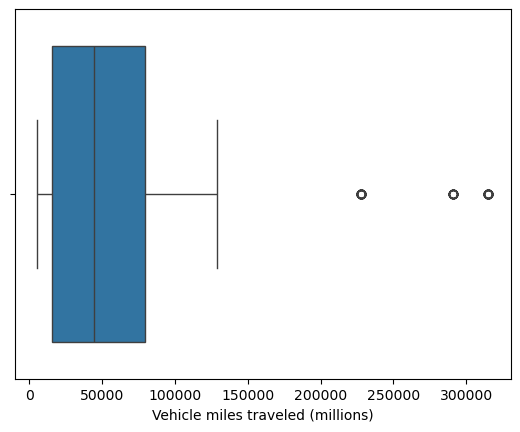

In [181]:
sns.boxplot(x='Vehicle miles traveled (millions)', data=df)
plt.show()

### The plot shows the range of Deaths, its between 0-150, any value after that is outlier

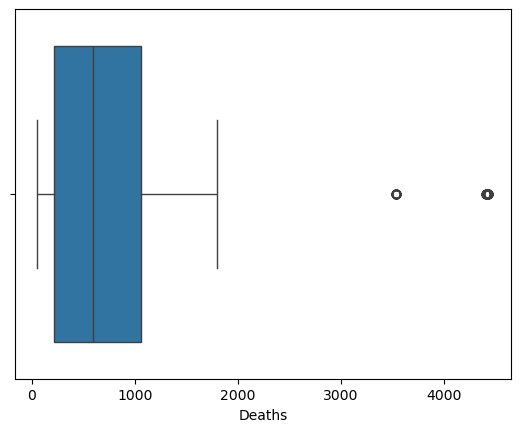

In [183]:
sns.boxplot(x='Deaths', data=df)
plt.show()

### The plot shows the range of Restrained fatally injured occupants, its between 0-500 , any value after that is outlier

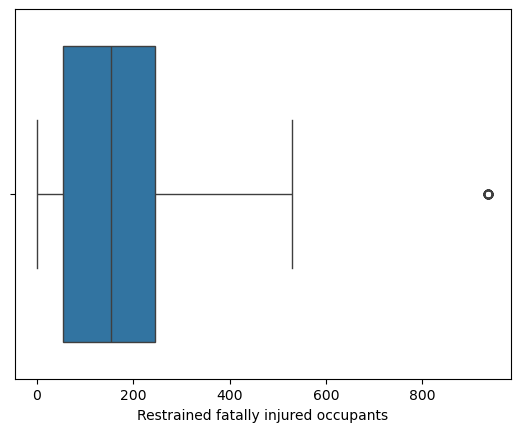

In [185]:
sns.boxplot(x='Restrained fatally injured occupants', data=df)
plt.show()

### The plot shows the range of Unrestrained fatally injured occupants, its between 0-500, any value after that is outlier

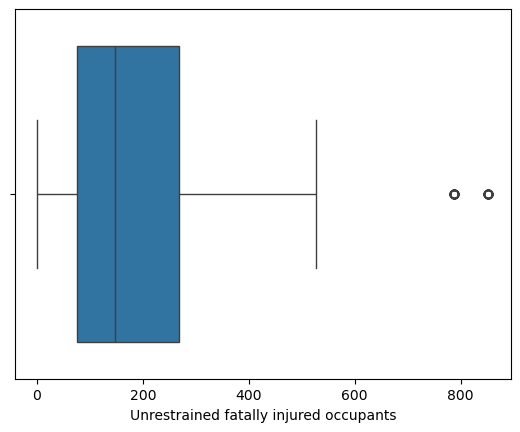

In [187]:
sns.boxplot(x='Unrestrained fatally injured occupants', data=df)
plt.show()

## Deleting the outliers

In [189]:
columns_to_check = ['Vehicle miles traveled (millions)', 'Deaths','Restrained fatally injured occupants','Unrestrained fatally injured occupants']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'Column: {col}')
    print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    filter_lower_bound = (df[col] < lower_bound)
    filter_upper_bound = (df[col] > upper_bound)
    print(f'The outlier values from the dataset:')
    print(df[col][(filter_lower_bound | filter_upper_bound)])
    print('-' * 40)

Column: Vehicle miles traveled (millions)
Q1: 15312.0, Q3: 79431.0, IQR: 64119.0
Lower Bound: -80866.5, Upper Bound: 175609.5
The outlier values from the dataset:
7       227757
17      315244
68      290890
92      290890
93      227757
         ...  
1535    290890
1551    227757
1559    227757
1573    315244
1583    315244
Name: Vehicle miles traveled (millions), Length: 92, dtype: int32
----------------------------------------
Column: Deaths
Q1: 215.0, Q3: 1057.0, IQR: 842.0
Lower Bound: -1048.0, Upper Bound: 2320.0
The outlier values from the dataset:
7       3530
17      4428
68      4408
92      4408
93      3530
        ... 
1535    4408
1551    3530
1559    3530
1573    4428
1583    4428
Name: Deaths, Length: 92, dtype: int32
----------------------------------------
Column: Restrained fatally injured occupants
Q1: 54.0, Q3: 245.0, IQR: 191.0
Lower Bound: -232.5, Upper Bound: 531.5
The outlier values from the dataset:
7       937
93      937
166     937
201     937
230     937


In [191]:
#delete outliers from dataset
df = df[~(filter_lower_bound | filter_upper_bound)].reset_index(drop=True)

In [193]:
df.rename(columns={"Drivers killed with known BAC results": "Deaths Due To Alcohol Involvement"}, inplace=True)

In [195]:
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Vehicle miles traveled (millions)',
       'Deaths', 'Deaths per 100,000 population',
       'Deaths per 100 million vehicle miles traveled', 'Total*',
       'Single-vehicle', 'Multiple-vehicle', 'All crashes',
       'Total drivers killed', 'Deaths Due To Alcohol Involvement',
       'Observed Seat belt usage', 'Restrained fatally injured occupants',
       'Unrestrained fatally injured occupants', 'Total',
       'Death By Veh

In [197]:
df.head(5)

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Multiple-vehicle,All crashes,Total drivers killed,Deaths Due To Alcohol Involvement,Observed Seat belt usage,Restrained fatally injured occupants,Unrestrained fatally injured occupants,Total,Death By Vehicle Type,Death By Road Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,308,703,402,17,79,227,200,703,282,205
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,336,744,385,275,87,230,256,744,264,487
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,317,643,327,237,79,165,191,643,79,284
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,91,213,107,97,93,52,85,213,18,168
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,73,182,106,82,93,58,65,182,68,27


In [199]:
df.to_csv('combined_CleanAndNew.csv', index=False)

In [201]:
df.rename(columns={"Unrestrained fatally injured occupants": "Deaths Without Seat Belt"}, inplace=True)

In [203]:
df.rename(columns={"Restrained fatally injured occupants": "Deaths With Seat Belt"}, inplace=True)

In [205]:
df.rename(columns={"Observed Seat belt usage": "Percentage Of Seat Belt Usage"}, inplace=True)

In [207]:
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Vehicle miles traveled (millions)',
       'Deaths', 'Deaths per 100,000 population',
       'Deaths per 100 million vehicle miles traveled', 'Total*',
       'Single-vehicle', 'Multiple-vehicle', 'All crashes',
       'Total drivers killed', 'Deaths Due To Alcohol Involvement',
       'Percentage Of Seat Belt Usage', 'Deaths With Seat Belt',
       'Deaths Without Seat Belt', 'Total', 'Death By Vehicle Type',
       'Death By Ro

In [209]:
df = df.drop(columns=['Vehicle miles traveled (millions)','Deaths', 'Deaths per 100 million vehicle miles traveled','Total*', 'All crashes', 'Total drivers killed','Total' ])
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Type_of_Junction', 'Type_of_Accident', 'Vehicle_Type',
       'Driver_Age_Group', 'Num_Vehicles_Involved', 'Num_Casualties',
       'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Deaths per 100,000 population',
       'Single-vehicle', 'Multiple-vehicle',
       'Deaths Due To Alcohol Involvement', 'Percentage Of Seat Belt Usage',
       'Deaths With Seat Belt', 'Deaths Without Seat Belt',
       'Death By Vehicle Type', 'Death By Road Type'],
      dtype='object')

In [211]:
df.head()

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,...,Population,"Deaths per 100,000 population",Single-vehicle,Multiple-vehicle,Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt,Death By Vehicle Type,Death By Road Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,Roundabout,Pedestrian involved,...,2940057,23.9,395,308,17,79,227,200,282,205
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,Overpass,Head-on collision,...,4512310,16.5,408,336,275,87,230,256,264,487
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,Roundabout,Cyclist involved,...,3045637,21.1,326,317,237,79,165,191,79,284
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,Underpass,Pedestrian involved,...,1122867,19.0,122,91,97,93,52,85,18,168
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,Intersection,Cyclist involved,...,1385340,13.1,109,73,82,93,58,65,68,27


In [213]:
df.to_csv('temp.csv', index=False)

In [217]:
cols = df.columns.tolist()
cols.insert(cols.index('Type_of_Road') + 1, cols.pop(cols.index('Death By Road Type')))
df = df[cols]
df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Death By Road Type,Type_of_Junction,...,Speeding_Factor,Population,"Deaths per 100,000 population",Single-vehicle,Multiple-vehicle,Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt,Death By Vehicle Type
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,205,Roundabout,...,1.650000,2940057,23.9,395,308,17,79,227,200,282
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,487,Overpass,...,0.246377,4512310,16.5,408,336,275,87,230,256,264
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,284,Roundabout,...,0.246377,3045637,21.1,326,317,237,79,165,191,79
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,168,Underpass,...,0.246377,1122867,19.0,122,91,97,93,52,85,18
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,27,Intersection,...,1.936170,1385340,13.1,109,73,82,93,58,65,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,3,T-Junction,...,0.680851,8683619,11.6,579,429,414,76,280,379,118
1535,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,0,Crossroads,...,1.098039,5282634,20.7,603,491,441,91,284,380,172
1536,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,0,Intersection,...,1.220339,909824,15.1,76,61,28,88,35,51,11
1537,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,330,Intersection,...,0.918367,5892539,10.1,320,276,60,88,166,166,13


In [219]:
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Death By Road Type', 'Type_of_Junction', 'Type_of_Accident',
       'Vehicle_Type', 'Driver_Age_Group', 'Num_Vehicles_Involved',
       'Num_Casualties', 'Speed_Limit', 'Distance_to_Nearest_Hospital',
       'Distance_to_Nearest_Police_Station', 'Visibility', 'Road_Width',
       'Road_Surface_Friction_Coefficient', 'Vehicle_Speed',
       'Time_Taken_for_Emergency_Response', 'Speeding_Violation',
       'Speeding_Factor', 'Population', 'Deaths per 100,000 population',
       'Single-vehicle', 'Multiple-vehicle',
       'Deaths Due To Alcohol Involvement', 'Percentage Of Seat Belt Usage',
       'Deaths With Seat Belt', 'Deaths Without Seat Belt',
       'Death By Vehicle Type'],
      dtype='object')

In [221]:
cols = df.columns.tolist()
cols.insert(cols.index('Vehicle_Type') + 1, cols.pop(cols.index('Death By Vehicle Type')))
df = df[cols]
df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Death By Road Type,Type_of_Junction,...,Speeding_Violation,Speeding_Factor,Population,"Deaths per 100,000 population",Single-vehicle,Multiple-vehicle,Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,205,Roundabout,...,True,1.650000,2940057,23.9,395,308,17,79,227,200
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,487,Overpass,...,False,0.246377,4512310,16.5,408,336,275,87,230,256
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,284,Roundabout,...,False,0.246377,3045637,21.1,326,317,237,79,165,191
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,168,Underpass,...,False,0.246377,1122867,19.0,122,91,97,93,52,85
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,27,Intersection,...,True,1.936170,1385340,13.1,109,73,82,93,58,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,3,T-Junction,...,False,0.680851,8683619,11.6,579,429,414,76,280,379
1535,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,0,Crossroads,...,True,1.098039,5282634,20.7,603,491,441,91,284,380
1536,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,0,Intersection,...,True,1.220339,909824,15.1,76,61,28,88,35,51
1537,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,330,Intersection,...,False,0.918367,5892539,10.1,320,276,60,88,166,166


In [223]:
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Death By Road Type', 'Type_of_Junction', 'Type_of_Accident',
       'Vehicle_Type', 'Death By Vehicle Type', 'Driver_Age_Group',
       'Num_Vehicles_Involved', 'Num_Casualties', 'Speed_Limit',
       'Distance_to_Nearest_Hospital', 'Distance_to_Nearest_Police_Station',
       'Visibility', 'Road_Width', 'Road_Surface_Friction_Coefficient',
       'Vehicle_Speed', 'Time_Taken_for_Emergency_Response',
       'Speeding_Violation', 'Speeding_Factor', 'Population',
       'Deaths per 100,000 population', 'Single-vehicle', 'Multiple-vehicle',
       'Deaths Due To Alcohol Involvement', 'Percentage Of Seat Belt Usage',
       'Deaths With Seat Belt', 'Deaths Without Seat Belt'],
      dtype='object')

In [573]:
df['Category_Of_Num_Vehicles'] = df['Num_Vehicles_Involved'].apply(lambda x: 'Single-vehicle' if x == 1 else 'Multiple-vehicle')
df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Death By Road Type,Type_of_Junction,...,Speeding_Violation,Speeding_Factor,Population,"Deaths per 100,000 population",Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt,Speed_Bin,Hospital_Distance_Range
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,205,Roundabout,...,True,1.650000,2940057,23.9,17,79,227,200,"[80, 100)",0-3 km
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,487,Overpass,...,False,0.246377,4512310,16.5,275,87,230,256,"[0, 20)",6-10 km
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,284,Roundabout,...,False,0.246377,3045637,21.1,237,79,165,191,"[0, 20)",3-6 km
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,168,Underpass,...,False,0.246377,1122867,19.0,97,93,52,85,"[0, 20)",6-10 km
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,27,Intersection,...,True,1.936170,1385340,13.1,82,93,58,65,"[80, 100)",3-6 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,3,T-Junction,...,False,0.680851,8683619,11.6,414,76,280,379,"[20, 40)",3-6 km
1535,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,0,Crossroads,...,True,1.098039,5282634,20.7,441,91,284,380,"[40, 60)",6-10 km
1536,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,0,Intersection,...,True,1.220339,909824,15.1,28,88,35,51,"[60, 80)",6-10 km
1537,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,330,Intersection,...,False,0.918367,5892539,10.1,60,88,166,166,"[40, 60)",6-10 km


In [231]:
selected_column111s = ['Num_Vehicles_Involved', 'Category_Of_Num_Vehicles']

# Display only those columns
df11122[selected_column111s].head(25)  # shows the first 5 rows

,Num_Vehicles_Involved,Category_Of_Num_Vehicles
0,5,Multiple-vehicle
1,1,Single-vehicle
2,4,Multiple-vehicle
3,2,Multiple-vehicle
4,2,Multiple-vehicle
5,3,Multiple-vehicle
6,4,Multiple-vehicle
7,2,Multiple-vehicle
8,2,Multiple-vehicle
9,2,Multiple-vehicle


In [231]:
df['Total_Death_Crashes_By_Category'] = df.apply(
    lambda row: row['Single-vehicle'] if row['Category_Of_Num_Vehicles'] == 'Single-vehicle' else row['Multiple-vehicle'],
    axis=1)
df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Death By Road Type,Type_of_Junction,...,Population,"Deaths per 100,000 population",Single-vehicle,Multiple-vehicle,Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt,Category_Of_Num_Vehicles,Total_Death_Crashes_By_Category
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,205,Roundabout,...,2940057,23.9,395,308,17,79,227,200,Multiple-vehicle,308
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,487,Overpass,...,4512310,16.5,408,336,275,87,230,256,Single-vehicle,408
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,284,Roundabout,...,3045637,21.1,326,317,237,79,165,191,Multiple-vehicle,317
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,168,Underpass,...,1122867,19.0,122,91,97,93,52,85,Multiple-vehicle,91
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,27,Intersection,...,1385340,13.1,109,73,82,93,58,65,Multiple-vehicle,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,3,T-Junction,...,8683619,11.6,579,429,414,76,280,379,Multiple-vehicle,429
1535,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,0,Crossroads,...,5282634,20.7,603,491,441,91,284,380,Multiple-vehicle,491
1536,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,0,Intersection,...,909824,15.1,76,61,28,88,35,51,Multiple-vehicle,61
1537,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,330,Intersection,...,5892539,10.1,320,276,60,88,166,166,Single-vehicle,320


In [237]:
selected_column1112s = ['Num_Vehicles_Involved', 'Category_Of_Num_Vehicles','Total_Death_Crashes_By_Category', 'Single-vehicle','Multiple-vehicle']

# Display only those columns
df[selected_column1112s].head(5)  # shows the first 5 rows

,Num_Vehicles_Involved,Category_Of_Num_Vehicles,Total_Death_Crashes_By_Category,Single-vehicle,Multiple-vehicle
0,5,Multiple-vehicle,308,395,308
1,1,Single-vehicle,408,408,336
2,4,Multiple-vehicle,317,326,317
3,2,Multiple-vehicle,91,122,91
4,2,Multiple-vehicle,73,109,73


In [239]:
cols = df.columns.tolist()
cols.insert(cols.index('Num_Vehicles_Involved') + 1, cols.pop(cols.index('Category_Of_Num_Vehicles')))
df = df[cols]
df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Death By Road Type,Type_of_Junction,...,Speeding_Factor,Population,"Deaths per 100,000 population",Single-vehicle,Multiple-vehicle,Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt,Total_Death_Crashes_By_Category
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,205,Roundabout,...,1.650000,2940057,23.9,395,308,17,79,227,200,308
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,487,Overpass,...,0.246377,4512310,16.5,408,336,275,87,230,256,408
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,284,Roundabout,...,0.246377,3045637,21.1,326,317,237,79,165,191,317
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,168,Underpass,...,0.246377,1122867,19.0,122,91,97,93,52,85,91
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,27,Intersection,...,1.936170,1385340,13.1,109,73,82,93,58,65,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,3,T-Junction,...,0.680851,8683619,11.6,579,429,414,76,280,379,429
1535,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,0,Crossroads,...,1.098039,5282634,20.7,603,491,441,91,284,380,491
1536,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,0,Intersection,...,1.220339,909824,15.1,76,61,28,88,35,51,61
1537,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,330,Intersection,...,0.918367,5892539,10.1,320,276,60,88,166,166,320


In [241]:
cols = df.columns.tolist()
cols.insert(cols.index('Category_Of_Num_Vehicles') + 1, cols.pop(cols.index('Total_Death_Crashes_By_Category')))
df = df[cols]
df

,State,Month,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Death By Road Type,Type_of_Junction,...,Speeding_Violation,Speeding_Factor,Population,"Deaths per 100,000 population",Single-vehicle,Multiple-vehicle,Deaths Due To Alcohol Involvement,Percentage Of Seat Belt Usage,Deaths With Seat Belt,Deaths Without Seat Belt
0,Mississippi,1,Sunday,07:32:40,Stormy,Dry,Daylight,Urban,205,Roundabout,...,True,1.650000,2940057,23.9,395,308,17,79,227,200
1,Kentucky,2,Friday,00:03:48,Rainy,Muddy,Night,Rural,487,Overpass,...,False,0.246377,4512310,16.5,408,336,275,87,230,256
2,Arkansas,2,Wednesday,01:26:56,Foggy,Wet,Night,Urban,284,Roundabout,...,False,0.246377,3045637,21.1,326,317,237,79,165,191
3,Montana,2,Monday,13:13:41,Stormy,Muddy,Daylight,Rural,168,Underpass,...,False,0.246377,1122867,19.0,122,91,97,93,52,85
4,Maine,1,Friday,18:26:19,Snowy,Wet,Dusk,Urban,27,Intersection,...,True,1.936170,1385340,13.1,109,73,82,93,58,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Virginia,2,Friday,20:10:48,Foggy,Muddy,Night,Highway,3,T-Junction,...,False,0.680851,8683619,11.6,579,429,414,76,280,379
1535,South Carolina,2,Wednesday,12:49:16,Snowy,Snowy,Daylight,Street,0,Crossroads,...,True,1.098039,5282634,20.7,603,491,441,91,284,380
1536,South Dakota,1,Friday,13:12:52,Rainy,Muddy,Daylight,Street,0,Intersection,...,True,1.220339,909824,15.1,76,61,28,88,35,51
1537,Wisconsin,1,Tuesday,13:10:31,Rainy,Snowy,Daylight,Rural,330,Intersection,...,False,0.918367,5892539,10.1,320,276,60,88,166,166


In [243]:
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Death By Road Type', 'Type_of_Junction', 'Type_of_Accident',
       'Vehicle_Type', 'Death By Vehicle Type', 'Driver_Age_Group',
       'Num_Vehicles_Involved', 'Category_Of_Num_Vehicles',
       'Total_Death_Crashes_By_Category', 'Num_Casualties', 'Speed_Limit',
       'Distance_to_Nearest_Hospital', 'Distance_to_Nearest_Police_Station',
       'Visibility', 'Road_Width', 'Road_Surface_Friction_Coefficient',
       'Vehicle_Speed', 'Time_Taken_for_Emergency_Response',
       'Speeding_Violation', 'Speeding_Factor', 'Population',
       'Deaths per 100,000 population', 'Single-vehicle', 'Multiple-vehicle',
       'Deaths Due To Alcohol Involvement', 'Percentage Of Seat Belt Usage',
       'Deaths With Seat Belt', 'Deaths Without Seat Belt'],
      dtype='object')

In [245]:
df = df.drop(columns=['Single-vehicle', 'Multiple-vehicle' ])
df.columns

Index(['State', 'Month', 'Day_of_Week', 'Time_of_Day', 'Weather_Conditions',
       'Road_Conditions', 'Light_Conditions', 'Type_of_Road',
       'Death By Road Type', 'Type_of_Junction', 'Type_of_Accident',
       'Vehicle_Type', 'Death By Vehicle Type', 'Driver_Age_Group',
       'Num_Vehicles_Involved', 'Category_Of_Num_Vehicles',
       'Total_Death_Crashes_By_Category', 'Num_Casualties', 'Speed_Limit',
       'Distance_to_Nearest_Hospital', 'Distance_to_Nearest_Police_Station',
       'Visibility', 'Road_Width', 'Road_Surface_Friction_Coefficient',
       'Vehicle_Speed', 'Time_Taken_for_Emergency_Response',
       'Speeding_Violation', 'Speeding_Factor', 'Population',
       'Deaths per 100,000 population', 'Deaths Due To Alcohol Involvement',
       'Percentage Of Seat Belt Usage', 'Deaths With Seat Belt',
       'Deaths Without Seat Belt'],
      dtype='object')

In [247]:
df.to_csv('IntegratedDataset.csv', index=False) 

## Questions 

### Q1. How does seat belt usage (with seat belt and without seat belt) affect death counts in different states?

#### Columns Used:
    Deaths With Seat Belt: Number of fatalities where seat belts were used.
    Deaths Without Seat Belt: Number of fatalities where seat belts were not used.
    State: state where the accident occurred.

#### Insight Goal:
    Analyze the impact of seat belt usage on vehicle-related fatalities across various states to identify patterns and trends.

#### Visualization:
    Two line plots:
    X-axis: States (sorted alphabetically or by fatality count).
    Y-axis: Death counts.
    Deaths With Seat Belt.
    Deaths Without Seat Belt.
    This visualization allows for a comparative view of the relationship between seat belt usage, and death counts across states.

<Figure size 3000x1000 with 0 Axes>

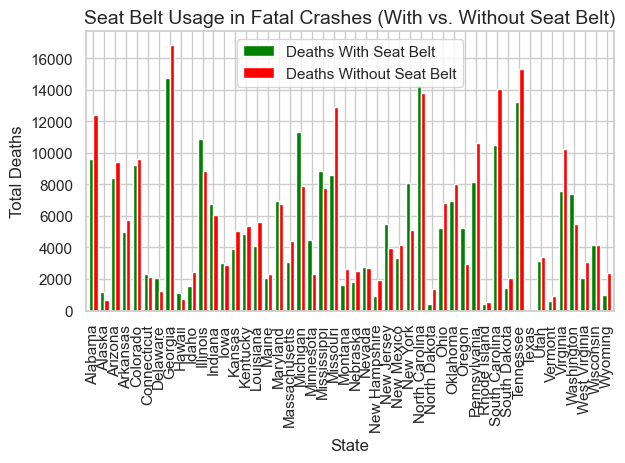

In [271]:
# First, we'll sum up the total deaths with and without seat belts for each state
seat_belt_usage = df[['State', 'Deaths With Seat Belt', 'Deaths Without Seat Belt']].groupby('State').sum().reset_index()

# Create a bar chart
plt.figure(figsize=(30, 10))
seat_belt_usage.set_index('State')[['Deaths With Seat Belt', 'Deaths Without Seat Belt']].plot(kind='bar', stacked=False, color=['green', 'red'], width=0.8)

# Add title and labels
plt.title('Seat Belt Usage in Fatal Crashes (With vs. Without Seat Belt)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


### Q2. How does alcohol-involved fatality data vary across U.S. states and driver age groups, and what patterns can be observed in relation to these variables?

    To explore this, we used two visualization techniques:

    A bar plot to compare the number of alcohol-related fatalities across different states. This helped identify which states have the highest or lowest counts of such deaths.
    
    A box plot to analyze the distribution of alcohol-involved deaths across various driver age groups. This allowed us to observe patterns such as  which age groups are most frequently involved, the spread of the data, and any notable outliers.

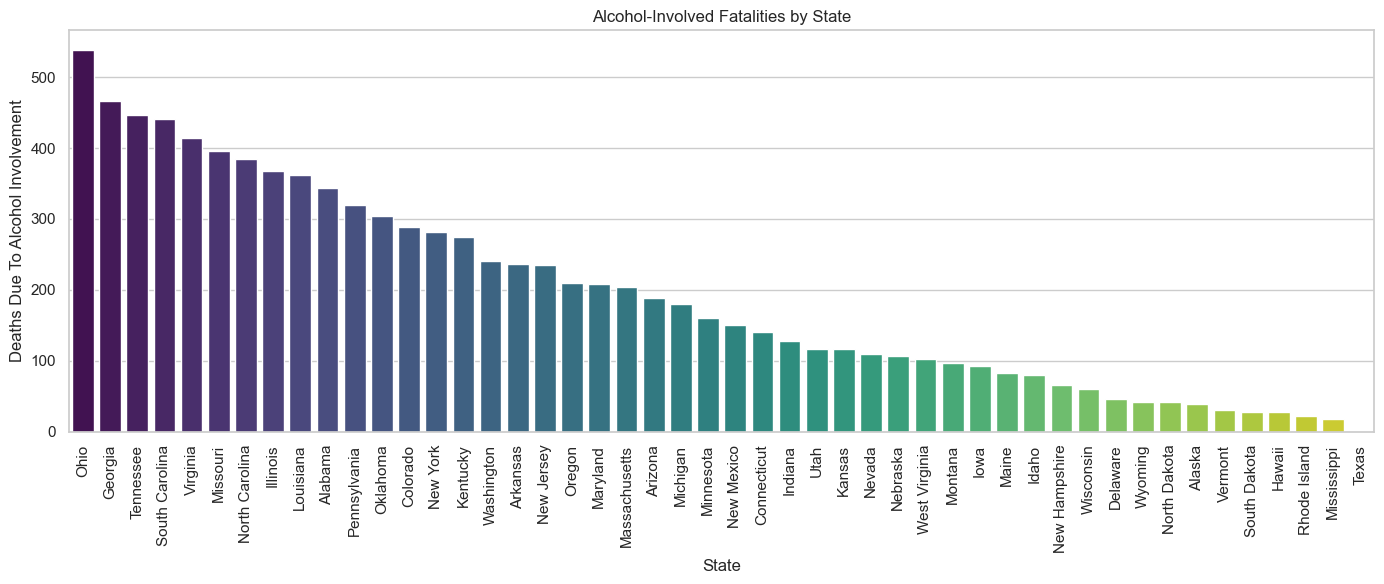

In [377]:
# sort by alcohol involvement
df_sorted = df.sort_values(by='Deaths Due To Alcohol Involvement', ascending=False)  #sort the dataframe by alcohol-involved deaths in descending order

plt.figure(figsize=(14, 6))  #create a figure with specified size
sns.barplot(  #create a bar plot
    x='State',  # x-axis: state
    y='Deaths Due To Alcohol Involvement',  # y-axis: alcohol-involved deaths
    data=df_sorted,  # dataframe containing the data
    palette='viridis'  # set color palette for the plot
)
plt.title('Alcohol-Involved Fatalities by State')  # add title
plt.xlabel('State')  # label for the x-axis
plt.ylabel('Deaths Due To Alcohol Involvement')  # label for the y-axis
plt.xticks(rotation=90)  # rotate the x-axis labels for better visibility
plt.tight_layout()  # adjust spacing for better layout
plt.show()  # display the plot

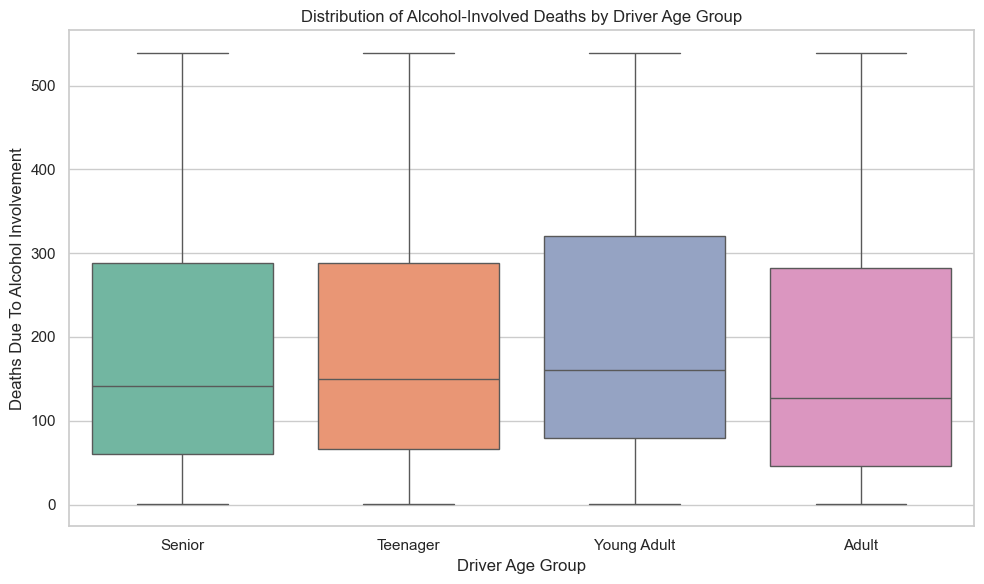

In [540]:
plt.figure(figsize=(10, 6))  #create a figure
sns.boxplot(  #create a boxplot
    x='Driver_Age_Group',  #x-axis: driver age group
    y='Deaths Due To Alcohol Involvement',  #y-axis: alcohol-involved deaths
    data=df,  #dataframe containing the data
    palette='Set2' # set the color palette for the plot
)
plt.title('Distribution of Alcohol-Involved Deaths by Driver Age Group')  # add a title to the chart
plt.xlabel('Driver Age Group')  #label for the x-axis
plt.ylabel('Deaths Due To Alcohol Involvement')  #label for the y-axis
plt.tight_layout()  #automatically adjust spacing for better layout
plt.show() #display the plot

### Q3. How does the type of junction and driver age group affect the number of deaths without seat belts?

    Columns used:
    Type_of_Junction: Type of road junction where the accident occurred.
    Driver_Age_Group: Age group of the driver involved in the fatality.
    Deaths Without Seat Belt: Number of fatalities where seat belts were not used.
    
    Insight goal:
    Analyze the relationship between the type of junction and driver age group to understand how these factors contribute to fatalities without seat belt usage. This analysis aims to identify patterns in road safety issues and vulnerable groups.
    
    Visualization:
    A bar chart:
    
    X-axis: Types of junctions (e.g., Crossroads, Intersection, Roundabout).
    Y-axis: Number of fatalities without seat belts.
    Hue: Driver age groups (e.g., Teenager, Adult, Senior, Young Adult).

    
    This visualization highlights the distribution of fatalities across various junction types and driver age groups, providing a detailed view of which junctions and demographics are most affected by the lack of seat belt usage.

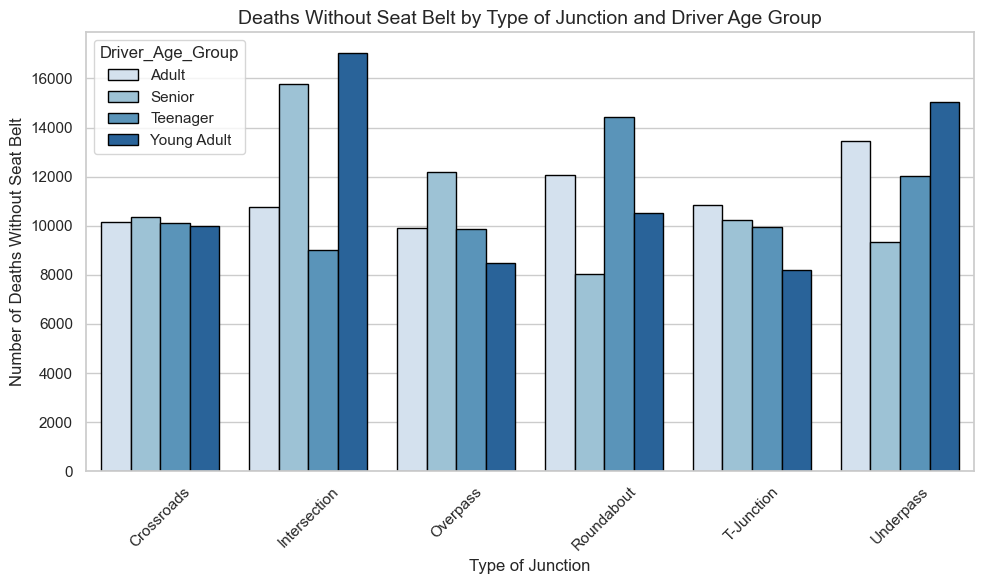

In [490]:
columns_needed = ['Type_of_Junction', 'Driver_Age_Group', 'Deaths Without Seat Belt']

# Check if the required columns exist in the dataset
if all(col in df.columns for col in columns_needed):
    subset_data = df[columns_needed]

    # Summarize data for grouping
    grouped_data_junction = subset_data.groupby(['Type_of_Junction', 'Driver_Age_Group']).sum().reset_index()

    # Create the plot for Type of Junction
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    sns.barplot(
        data=grouped_data_junction,
        x='Type_of_Junction',
        y='Deaths Without Seat Belt',
        hue='Driver_Age_Group',
        palette='Blues',
        edgecolor='black'
    )

    plt.title('Deaths Without Seat Belt by Type of Junction and Driver Age Group', fontsize=14)
    plt.xlabel('Type of Junction', fontsize=12)
    plt.ylabel('Number of Deaths Without Seat Belt', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## General Insights

#### These graphs illustrates the number of deaths throughout all the states, with and without wearing the seatbelt

<Figure size 1600x1000 with 0 Axes>

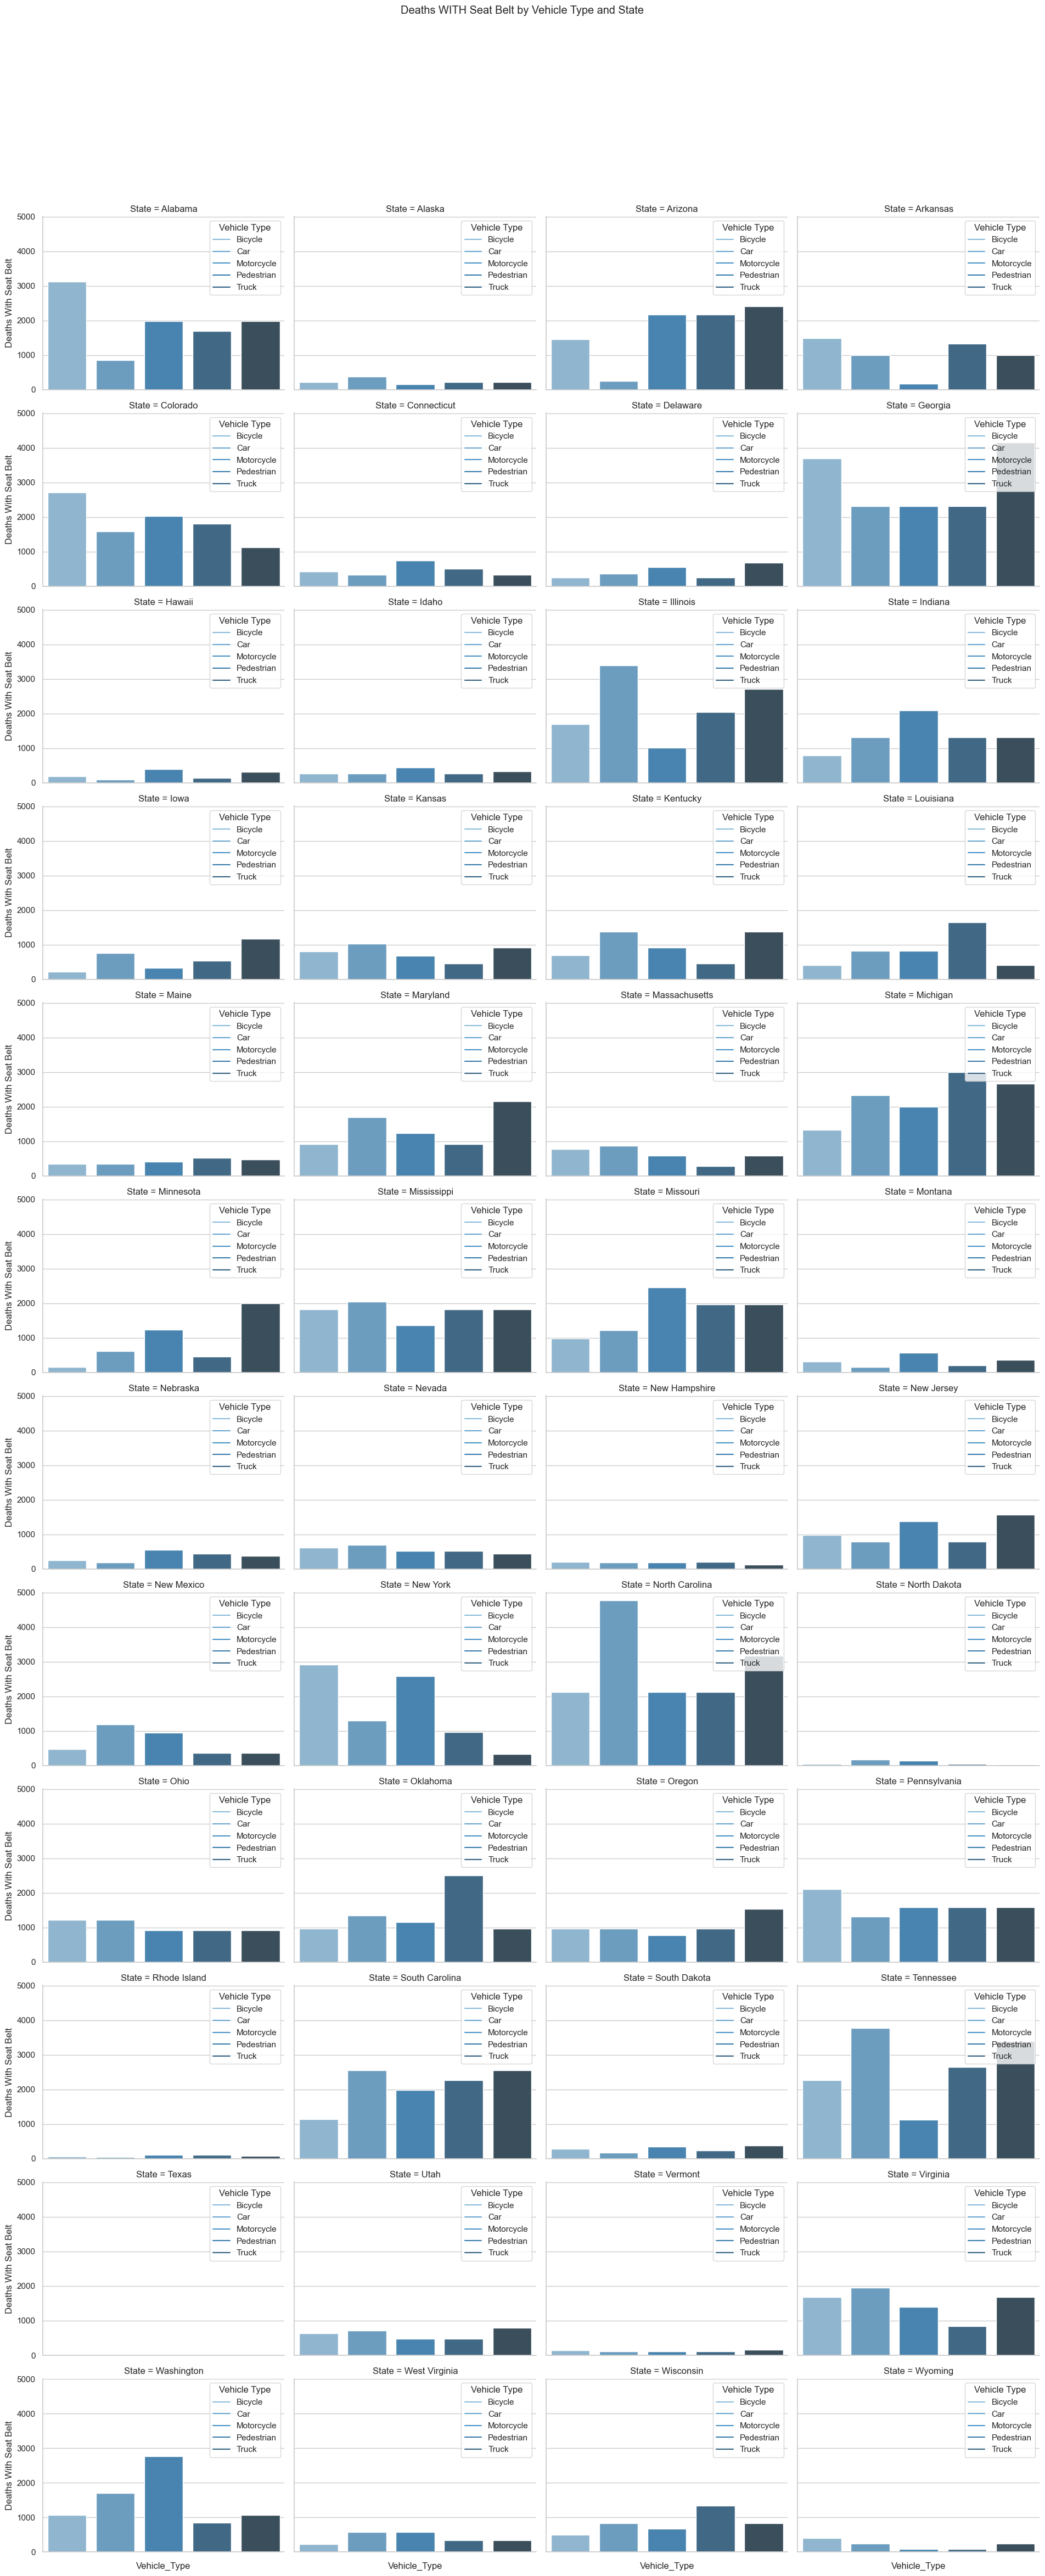

<Figure size 1600x1000 with 0 Axes>

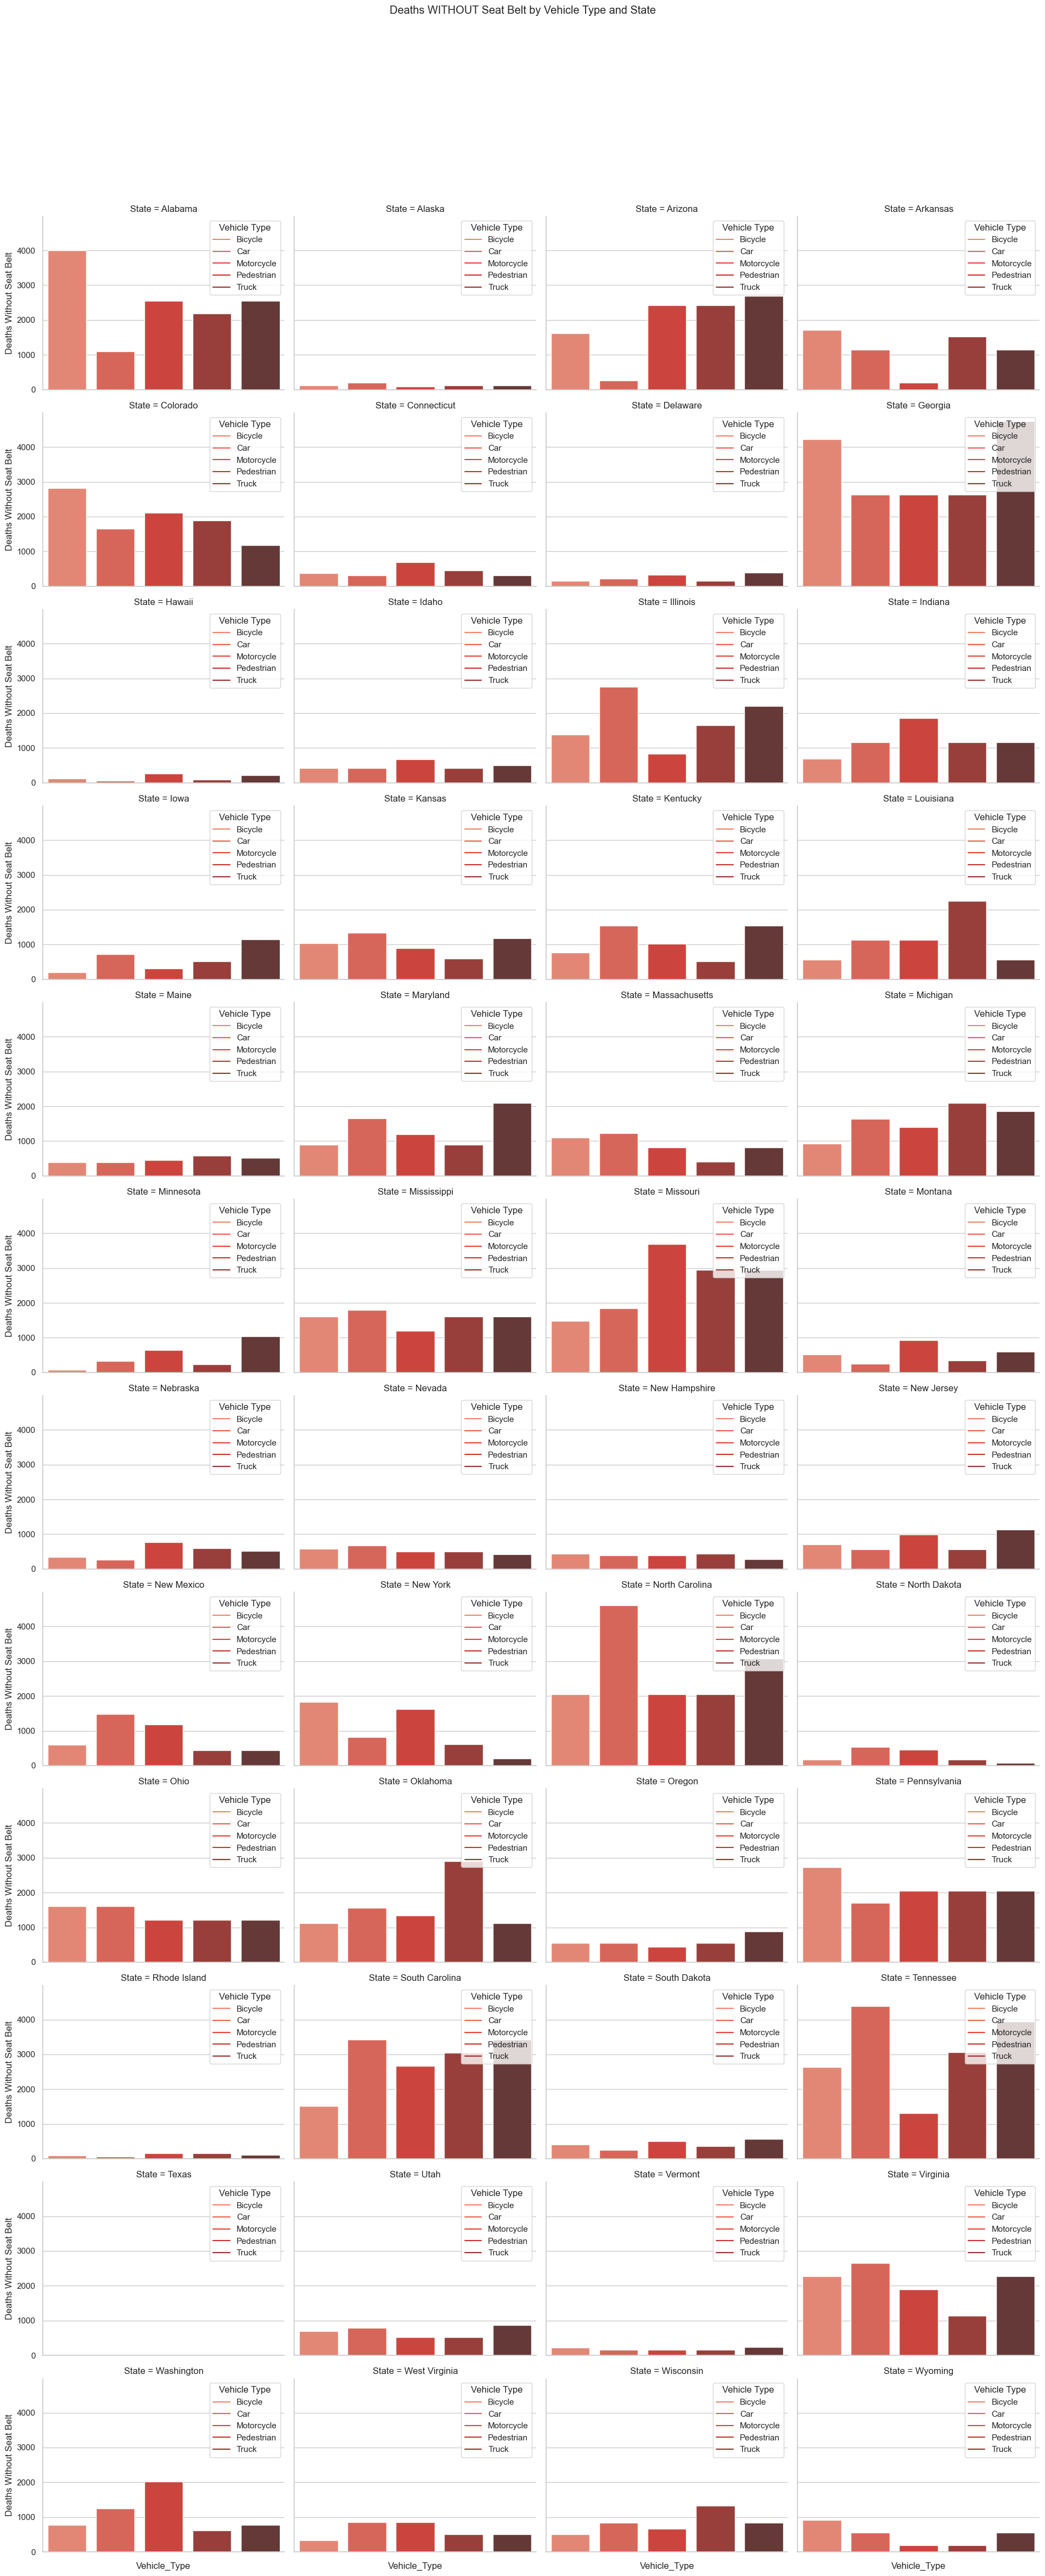

In [548]:
# group the data by state and vehicle type, summing up deaths with and without seat belts
grouped_df = df.groupby(['State', 'Vehicle_Type']).agg({
    'Deaths With Seat Belt': 'sum',
    'Deaths Without Seat Belt': 'sum'
}).reset_index()

# get unique vehicle types for the legend
vehicle_types = grouped_df['Vehicle_Type'].unique()

# ========== plot 1: deaths with seat belt ==========
# set figure size and style
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# create a bar plot for deaths with seat belt by vehicle type and state
g1 = sns.catplot(data=grouped_df,
                 kind="bar",
                 x="Vehicle_Type",
                 y="Deaths With Seat Belt",
                 col="State",
                 col_wrap=4,
                 height=4,
                 aspect=1.2,
                 palette="Blues_d")

# rotate x-axis labels for readability
g1.set_xticklabels(rotation=45)
# adjust the subplot layout to avoid overlapping
g1.fig.subplots_adjust(top=0.9)
# set the title for the overall plot
g1.fig.suptitle("Deaths WITH Seat Belt by Vehicle Type and State")

# add legend for vehicle types to each subplot
for ax in g1.axes.flat:
    ax.legend(handles=[
        plt.Line2D([], [], color=sns.color_palette("Blues_d")[i], label=vehicle_types[i])
        for i in range(len(vehicle_types))
    ], title="Vehicle Type", loc='upper right')

# ========== plot 2: deaths without seat belt ==========
# set figure size for the second plot
plt.figure(figsize=(16, 10))

# create a bar plot for deaths without seat belt by vehicle type and state
g2 = sns.catplot(data=grouped_df,
                 kind="bar",
                 x="Vehicle_Type",
                 y="Deaths Without Seat Belt",
                 col="State",
                 col_wrap=4,
                 height=4,
                 aspect=1.2,
                 palette="Reds_d")

# rotate x-axis labels for readability
g2.set_xticklabels(rotation=45)
# adjust the subplot layout to avoid overlapping
g2.fig.subplots_adjust(top=0.9)
# set the title for the overall plot
g2.fig.suptitle("Deaths WITHOUT Seat Belt by Vehicle Type and State")

# add legend for vehicle types to each subplot
for ax in g2.axes.flat:
    ax.legend(handles=[
        plt.Line2D([], [], color=sns.color_palette("Reds_d")[i], label=vehicle_types[i])
        for i in range(len(vehicle_types))
    ], title="Vehicle Type", loc='upper right')

# show the plots
plt.show()

#### We explored how fatal road crashes are varying in between urban and rural areas, behind which datawas analyzed by three perspectives. First, from the bar plot between total road deaths, the rural area suffers higher than urban areas slightly, thereby, rural areas can be said to be relatively riskier although there is no significant difference. Secondly, by comparing vehicle types contributing to death cases within the two areas resulted in noting that some vehicles like cars or motorcycles were in fact heavy contributors to the highest number of deaths, especially in rural areas. Last, the heat map summarizes average deaths per vehicle type between rural and urban roads, and so from it we can observe that cars in rural roads result in much higher number of deaths giving an average of 234, while in urban roads it gave around 173, showcasng that rural roads tend to be more severe. These visualizations create a comprehensive view of how the environment and vehicle type interact in producing crash fatality patterns, thereby suggesting that we need more targeted safety interventions in rural areas. 

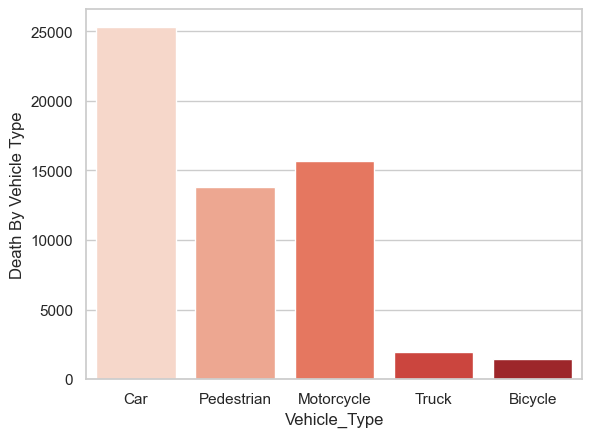

<Figure size 1000x600 with 0 Axes>

In [530]:
# Plot deaths by vehicle type only for Urban and Rural roads
sns.barplot(x='Vehicle_Type', y='Death By Vehicle Type', data=df_filtered, estimator=sum, ci=None, palette='Reds')
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

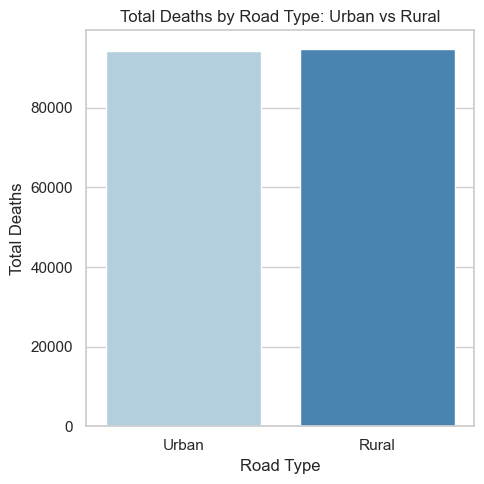

In [534]:
# Filter DataFrame to include only 'Urban' and 'Rural'
df_filtered = df[df['Type_of_Road'].isin(['Urban', 'Rural'])]

plt.figure(figsize=(5, 5))
sns.barplot(x='Type_of_Road', y='Death By Road Type', data=df_filtered, estimator=sum, ci=None, palette='Blues')
plt.title('Total Deaths by Road Type: Urban vs Rural')
plt.ylabel('Total Deaths')
plt.xlabel('Road Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

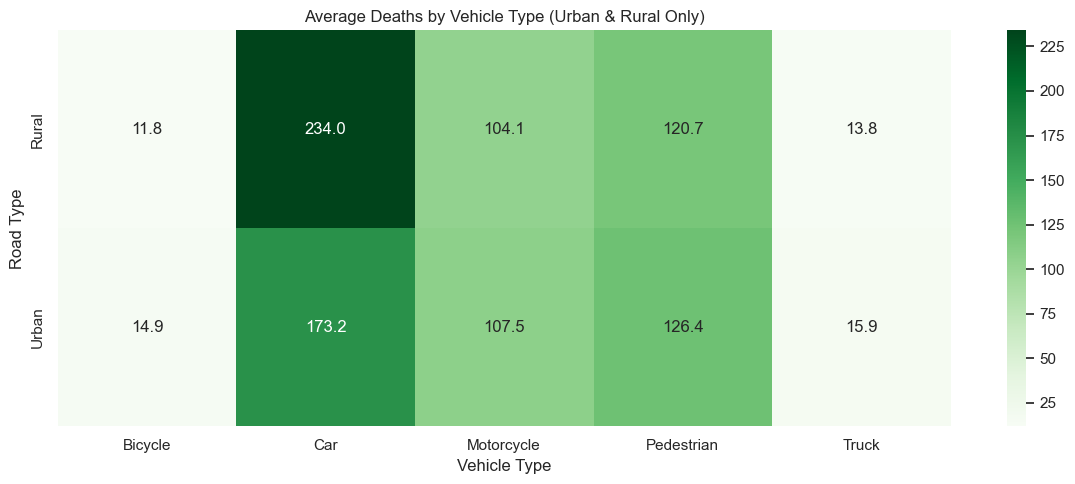

In [536]:
# Filter only Urban and Rural
df_filtered = df[df['Type_of_Road'].isin(['Urban', 'Rural'])]

# Create pivot table
pivot = df_filtered.pivot_table(
    index='Type_of_Road', 
    columns='Vehicle_Type', 
    values='Death By Vehicle Type', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Greens")

plt.title('Average Deaths by Vehicle Type (Urban & Rural Only)')
plt.ylabel('Road Type')
plt.xlabel('Vehicle Type')
plt.tight_layout()
plt.show()

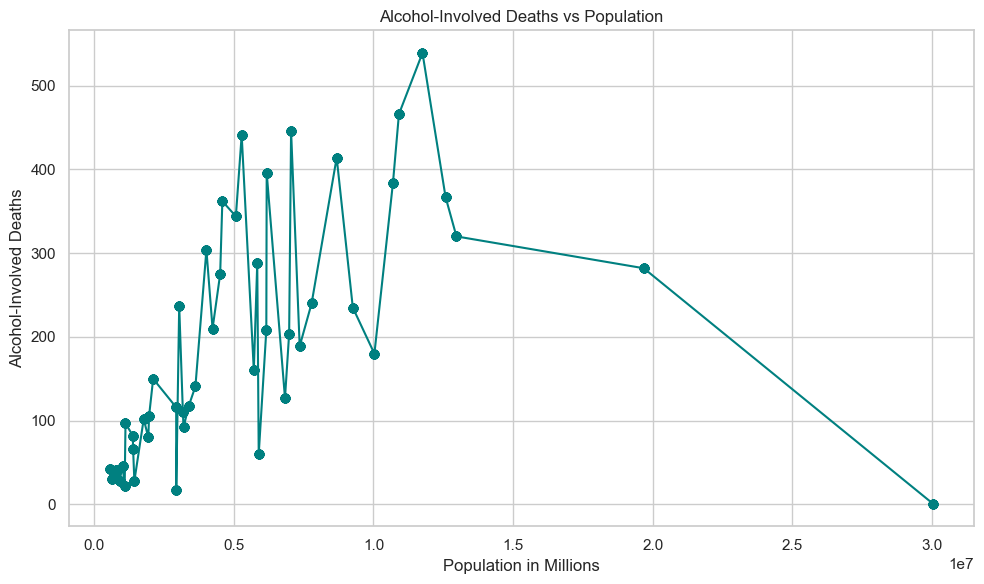

In [373]:

df_sorted_pop = df.sort_values(by='Population')  #sorting the dataframe by the "Population" column
plt.figure(figsize=(10, 6))  #creating a figure with specified size
plt.plot(  # plot a line graph
    df_sorted_pop['Population'],  # X-axis: Population
    df_sorted_pop['Deaths Due To Alcohol Involvement'],  #Y-axis: Alcohol-Involved Deaths
    marker='o',  #add markers (dots) for data points
    linestyle='-',  #use a solid line to connect points
    color='teal'  #set the line color to teal
)
plt.title('Alcohol-Involved Deaths vs Population')  # add a title to the chart
plt.xlabel('Population in Millions')  #label for the X-axis
plt.ylabel('Alcohol-Involved Deaths')  #label for the Y-axis
plt.grid(True)  #add a grid for better readability
plt.tight_layout()  #adjust spacing for better layout
plt.show()  #display the plot



#The plot illustrates the relationship between the population in each state and the number of deaths that resulted from alcohol. 
#Some insights drawn:
#There is no clear trend observed, as the relationship between populaiton and alcoholdeaths in fact doesn't appear to be straightforward linear one.
#The number of deaths fluctuates as the population increases. 
#So,we can conclude that the number of alcohol involved deaths doesn't seem to increase proportionally with the population, ome less populated regions
#have very low number of deaths, which makes sense

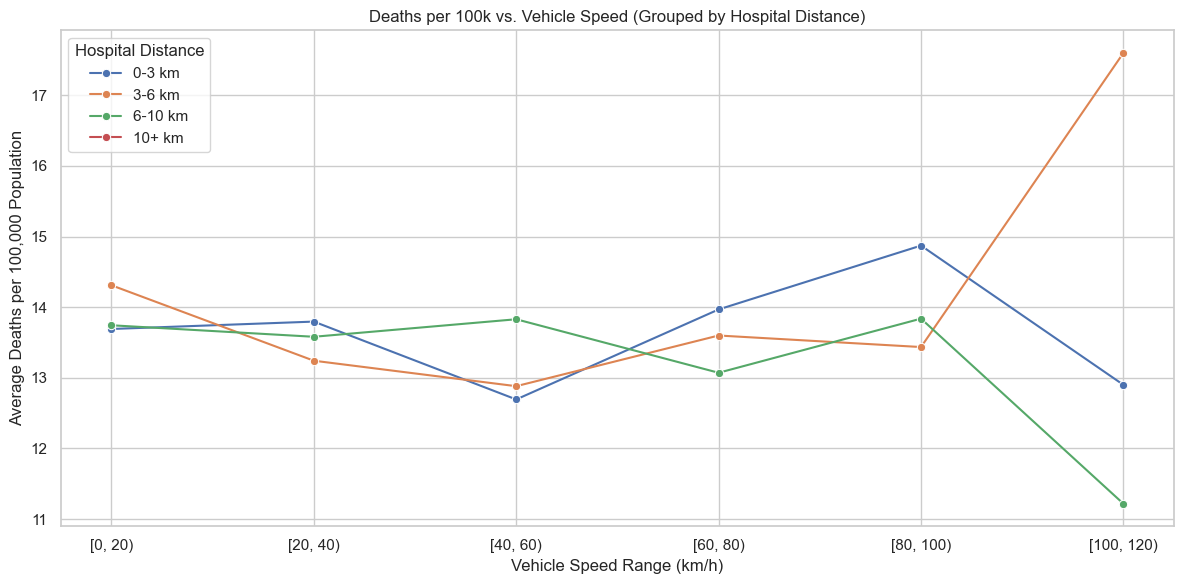

In [472]:
df['Speed_Bin'] = pd.cut(df['Vehicle_Speed'], bins=[0, 20, 40, 60, 80, 100, 120, 150], right=False)


grouped = df.groupby(['Speed_Bin', 'Hospital_Distance_Range'])['Deaths per 100,000 population'].mean().reset_index()


grouped['Speed_Bin_Label'] = grouped['Speed_Bin'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Speed_Bin_Label', y='Deaths per 100,000 population', hue='Hospital_Distance_Range', marker="o")
plt.title('Deaths per 100k vs. Vehicle Speed (Grouped by Hospital Distance)')
plt.xlabel('Vehicle Speed Range (km/h)')
plt.ylabel('Average Deaths per 100,000 Population')
#plt.xticks(rotation=45)
plt.legend(title='Hospital Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

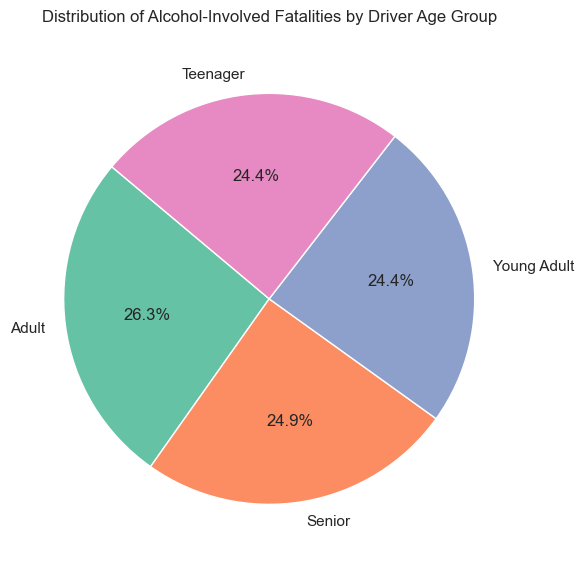

In [323]:
# count number of deaths by driver age group
age_group_counts = df['Driver_Age_Group'].value_counts()

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors, startangle=140)
plt.title('Distribution of Alcohol-Involved Fatalities by Driver Age Group')
plt.axis('equal')  # equal aspect ratio ensures the pie is a circle.
plt.tight_layout()
plt.show()

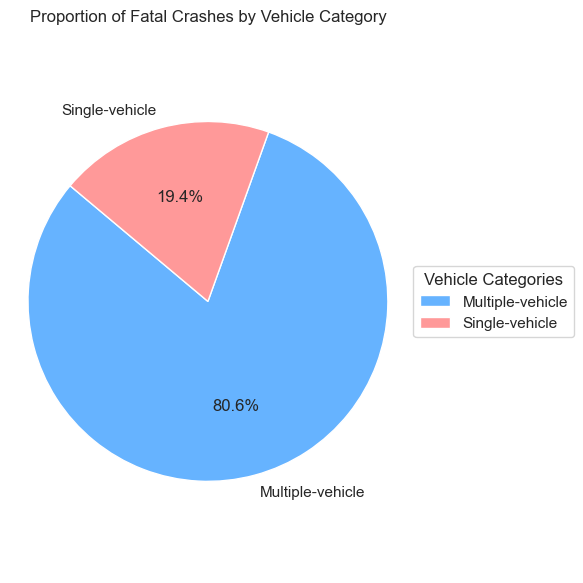

In [538]:
#grouping the total deaths by vehicle category from existing df
category_totals = df.groupby('Category_Of_Num_Vehicles')['Total_Death_Crashes_By_Category'].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']  # Adjusted colors to allow more categories if needed
wedges, texts, autotexts = plt.pie(
    category_totals, 
    labels=category_totals.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140
)


plt.title('Proportion of Fatal Crashes by Vehicle Category')


plt.legend(wedges, category_totals.index, title="Vehicle Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

## Hypothesis Section

### How does seatbelt usage affect the number of deaths?, and does wearing the seatbelt reduce the number of death count.
    H0: the mean number of deaths without seat belts is equal to the mean number of deaths with seat belts.
    H1: the mean number of deaths without seat belts is greater than the mean number of deaths with seat belts.

In [438]:
x1 = df['Deaths Without Seat Belt']
x2 = df['Deaths With Seat Belt']

In [440]:
#x1 is the mean deaths with wearing seatbelt
x1Mean = x1.mean()
#x2 is the mean deaths without wearing seatbelt
x2Mean = x2.mean()
#l1 is the length of deaths wearing seatbelt
l1 = len(x1)
#l2 is the length of deaths without wearing seatbelt
l2 = len(x2)

In [442]:
print(x1Mean,x2Mean)
print(l1,l2)

173.953216374269 162.35412605588044
1539 1539


In [444]:
x1var=x1.var(ddof=1)
x2var=x2.var(ddof=1)
x1var,x2var

(18228.8937786599, 15363.87516339365)

In [446]:
num=(l1-1)*x1var+(l2-1)*x2var
dem=l1+l2-2
part1=num/dem
part2=(1/l1)+(1/l2)
S=np.sqrt(part1*part2)
S

4.672008147605145

In [448]:
tScore=(x1Mean-x2Mean)/S
tScore

2.4826776734827005

In [450]:
DegreeF=l1+l2-2
DegreeF

3076

In [452]:
alpha = 0.05

In [454]:
scipy.stats.t.ppf(1-0.05, 3076)

1.645349150669275

In [456]:
scipy.stats.ttest_ind(x1, x2).statistic

2.482677673482697

#### Since the T-score is greater than table value, we reject H0. 

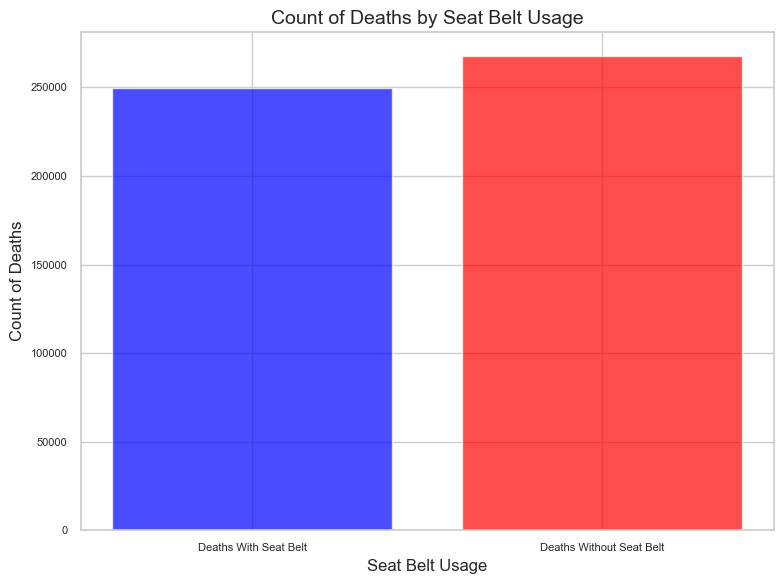

In [518]:
death_counts = {
    'Deaths With Seat Belt': df['Deaths With Seat Belt'].sum(),
    'Deaths Without Seat Belt': df['Deaths Without Seat Belt'].sum()
}

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(death_counts.keys(), death_counts.values(), color=['blue', 'red'], alpha=0.7)

# Add labels and title
plt.xlabel('Seat Belt Usage', fontsize=12)
plt.ylabel('Count of Deaths', fontsize=12)
plt.title('Count of Deaths by Seat Belt Usage', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the bar chart
plt.tight_layout()
plt.show()